Processing: 20241230-172630.csv


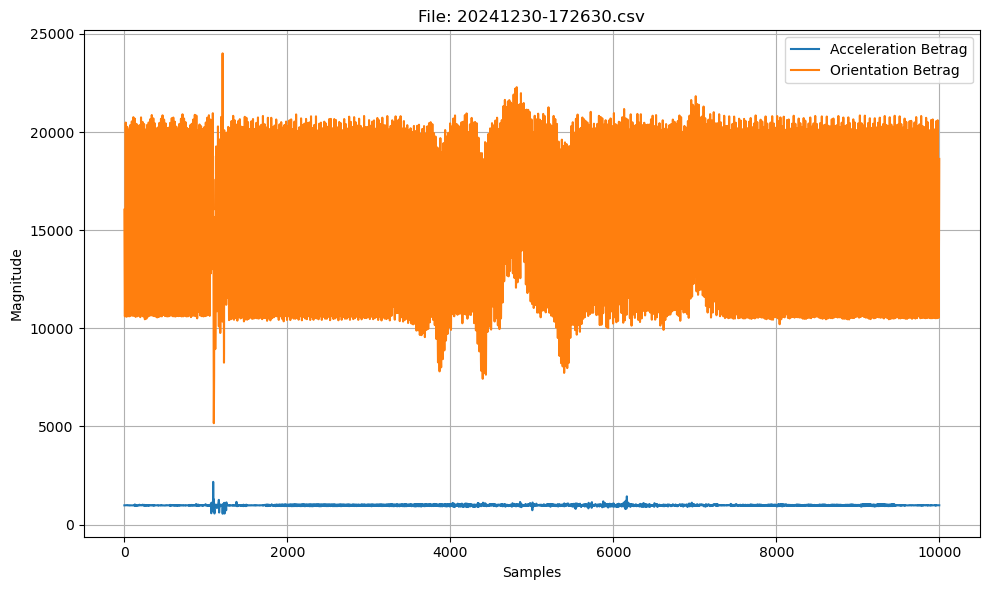

Processing: 20241230-185534.csv


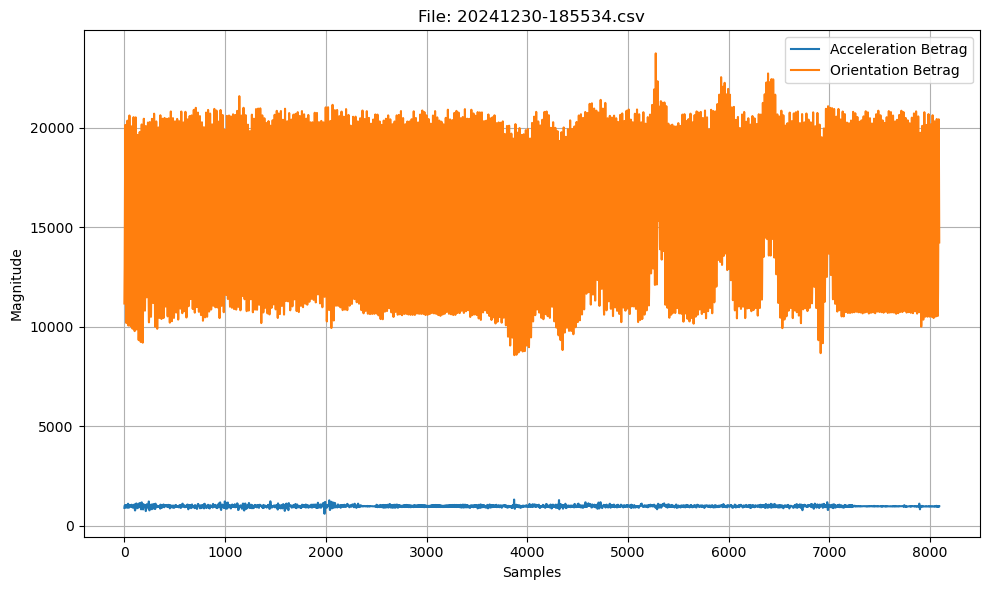

Processing: 20241230-142902.csv


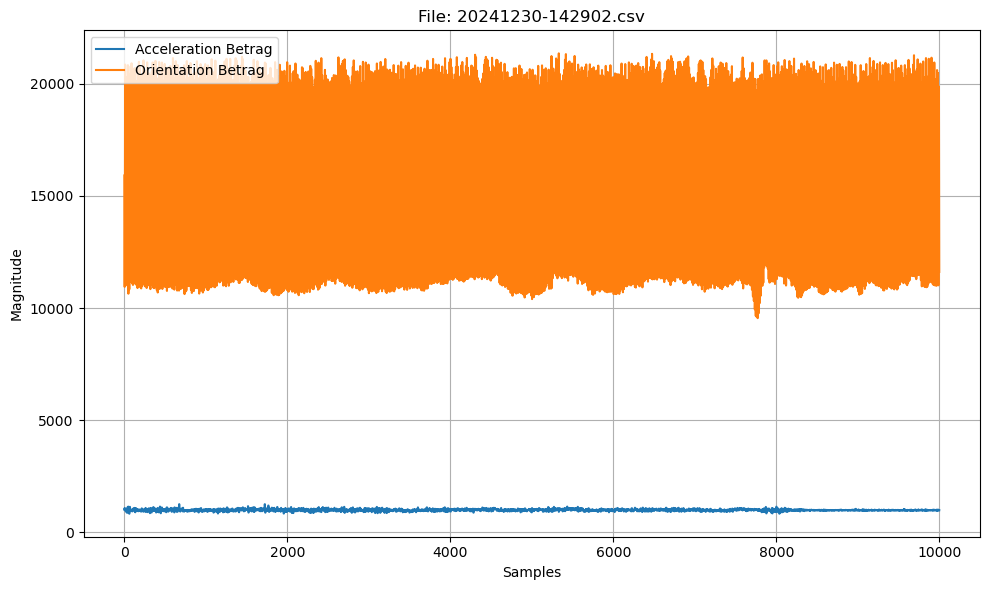

Processing: 20241230-185132.csv


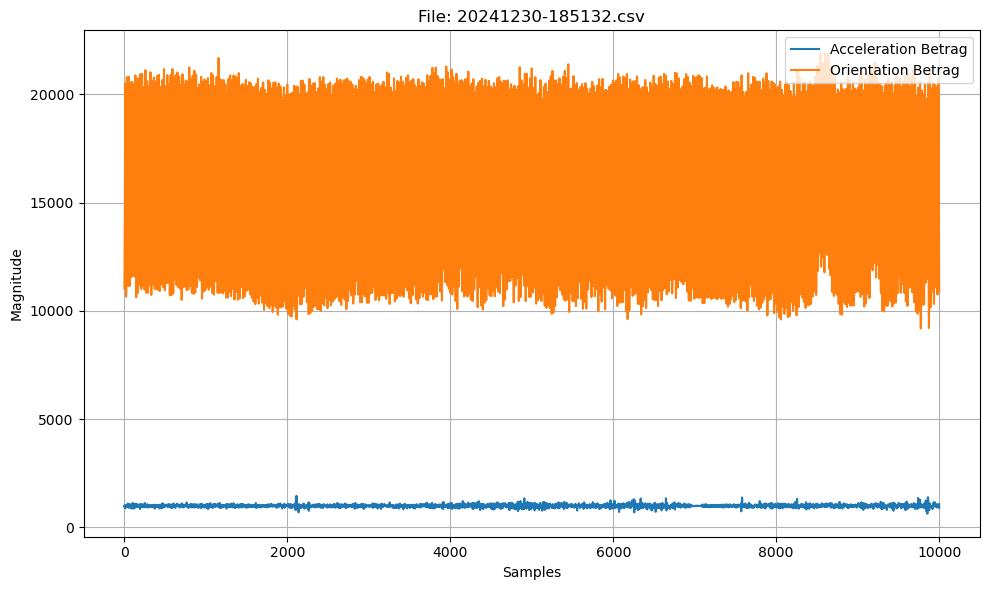

Processing: 20241230-181631.csv


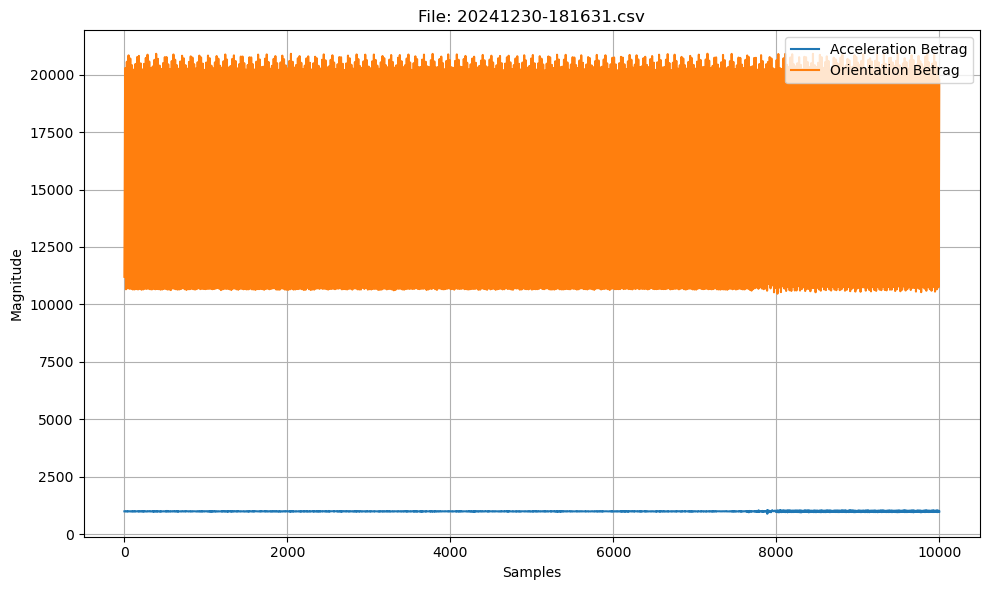

Processing: 20241230-141401.csv


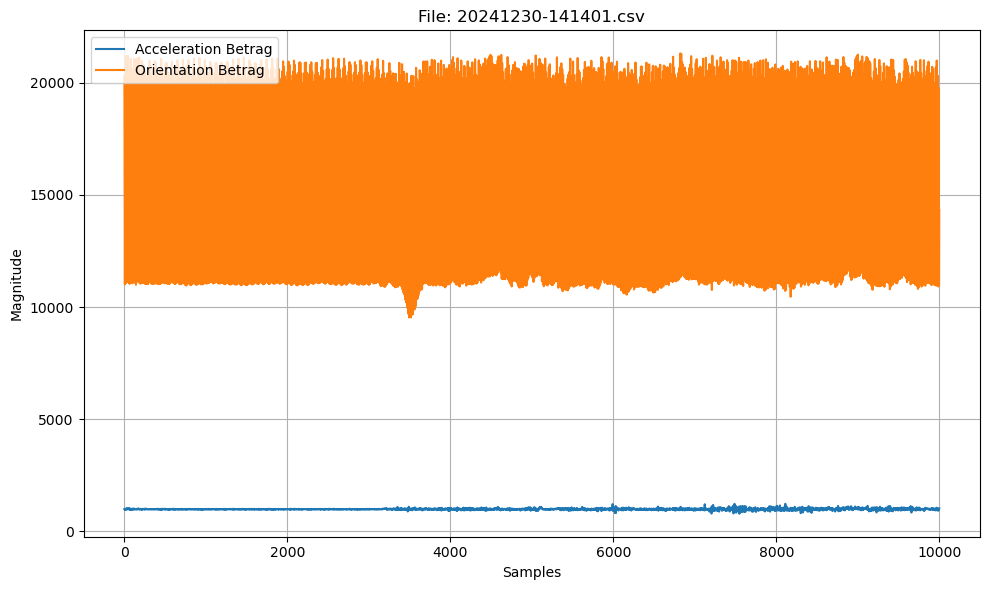

Processing: 20241230-133901.csv


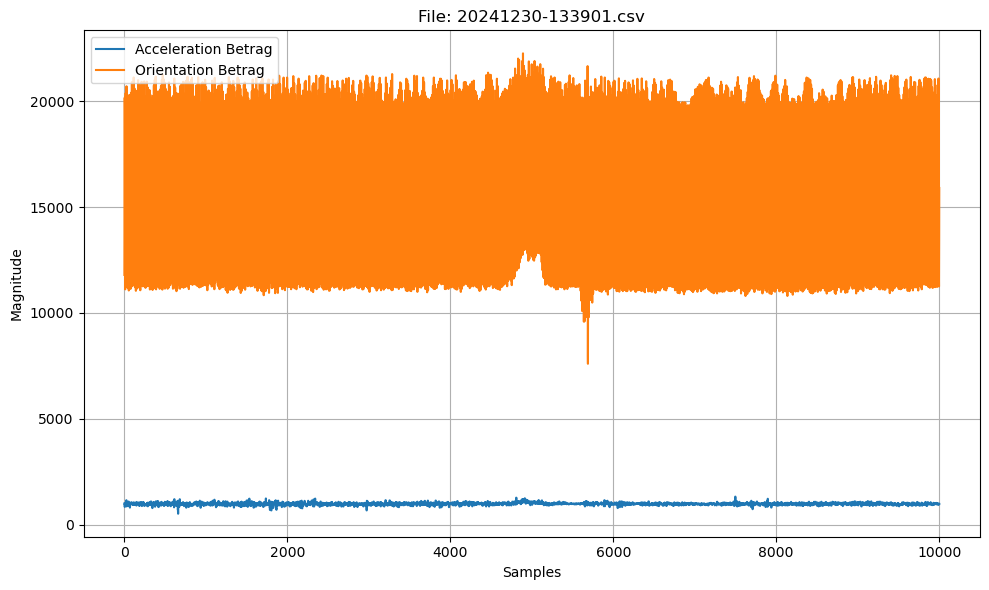

Processing: 20241230-163918.csv


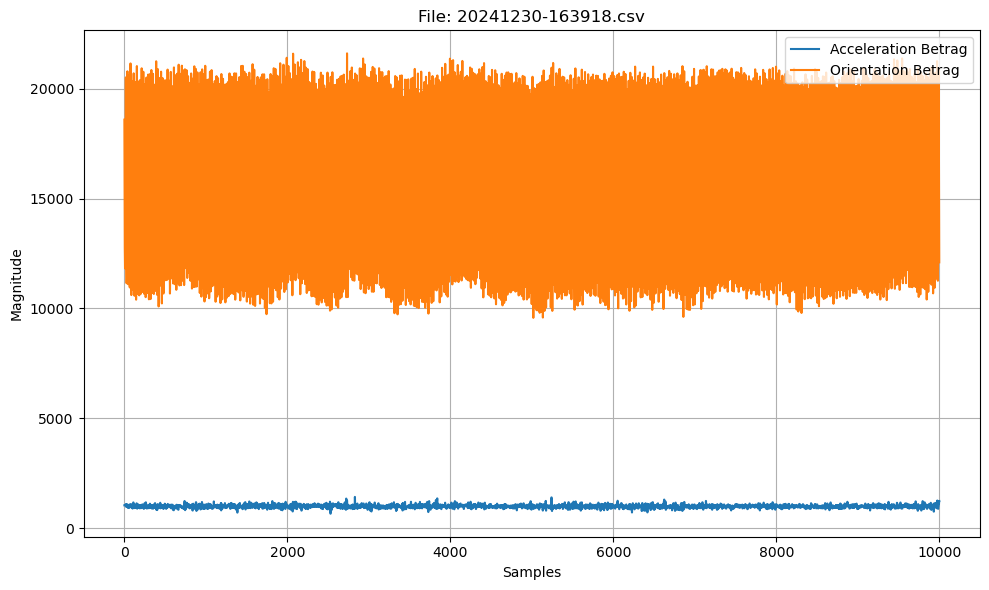

Processing: 20241230-174131.csv


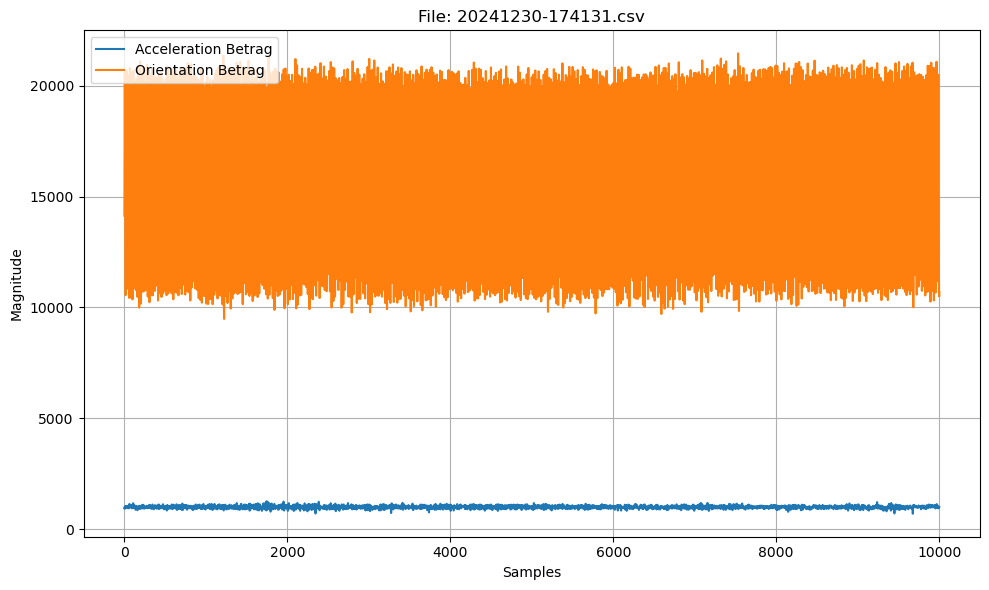

Processing: 20241230-132401.csv


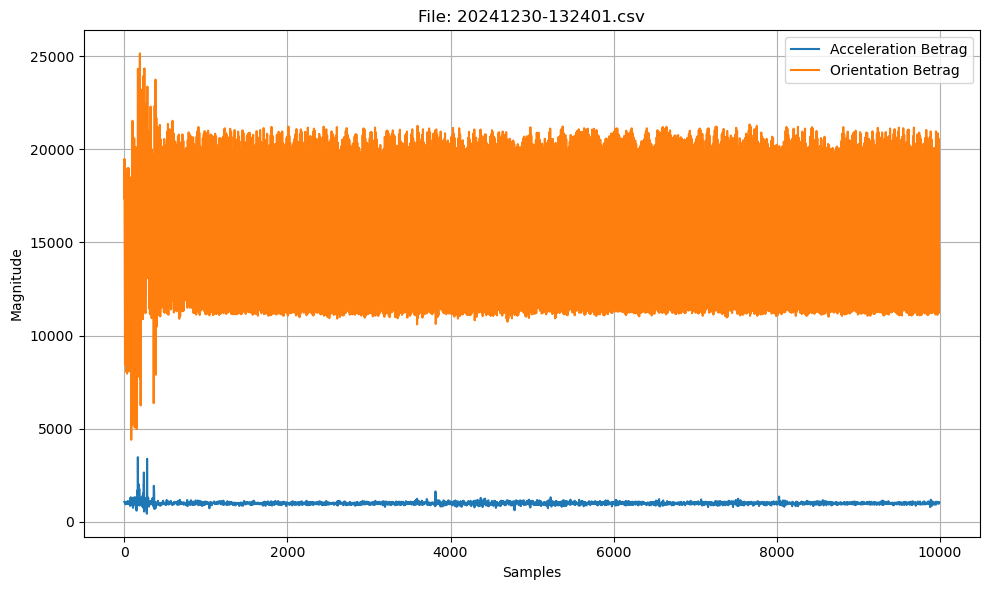

Processing: 20241230-140901.csv


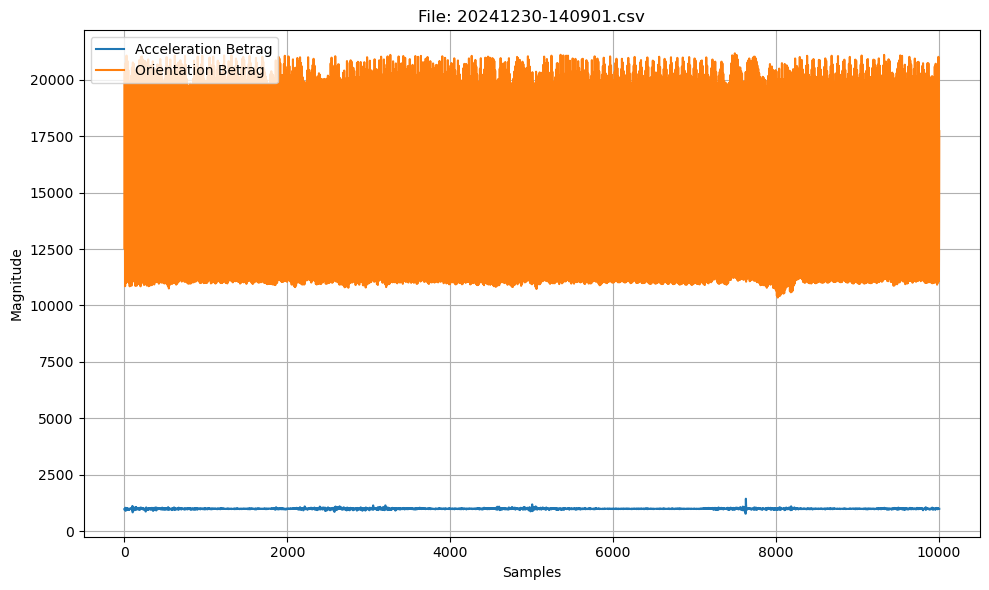

Processing: 20241230-170418.csv


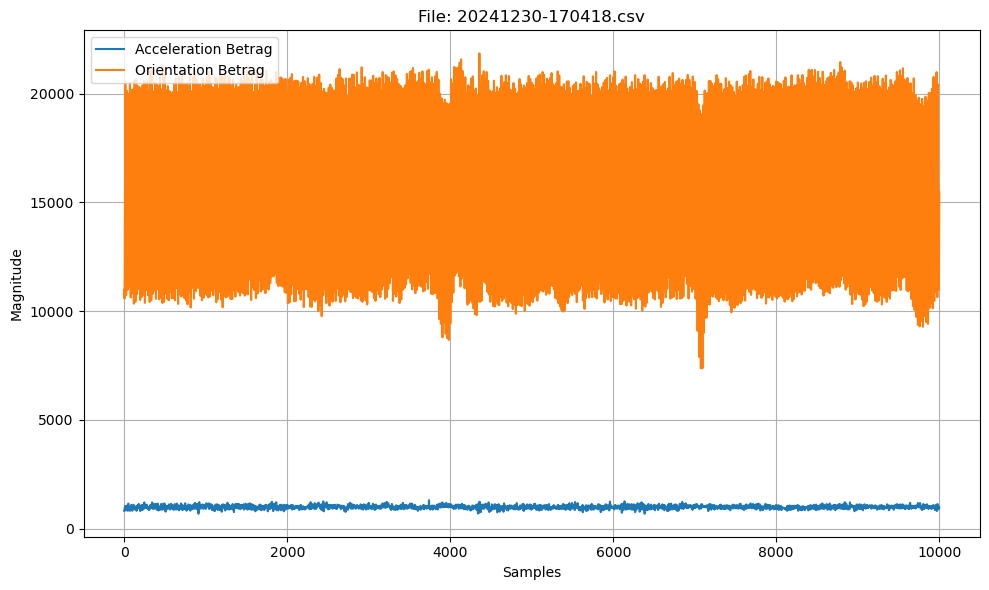

Processing: 20241230-183631.csv


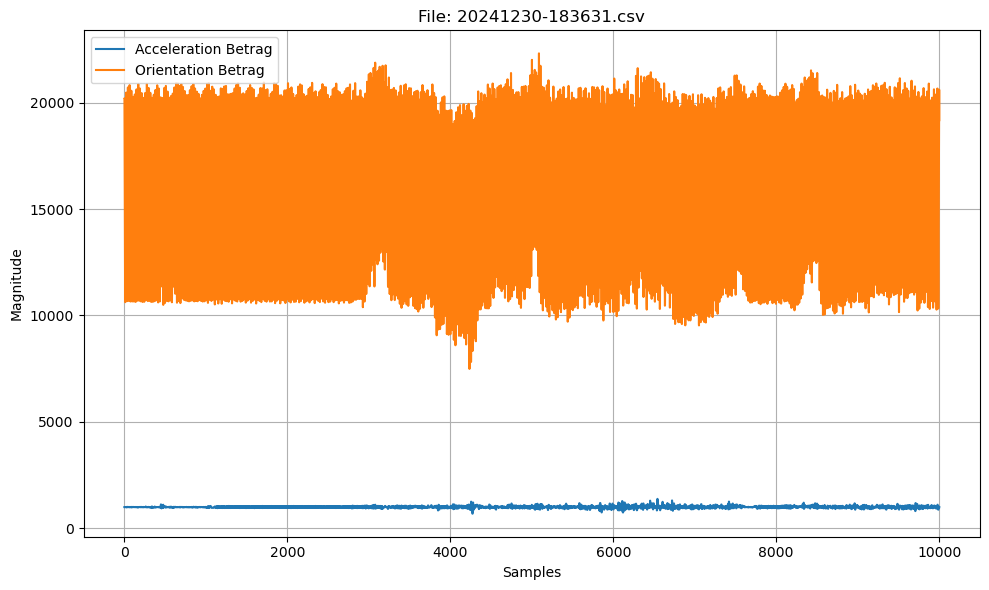

Processing: 20241230-135901.csv


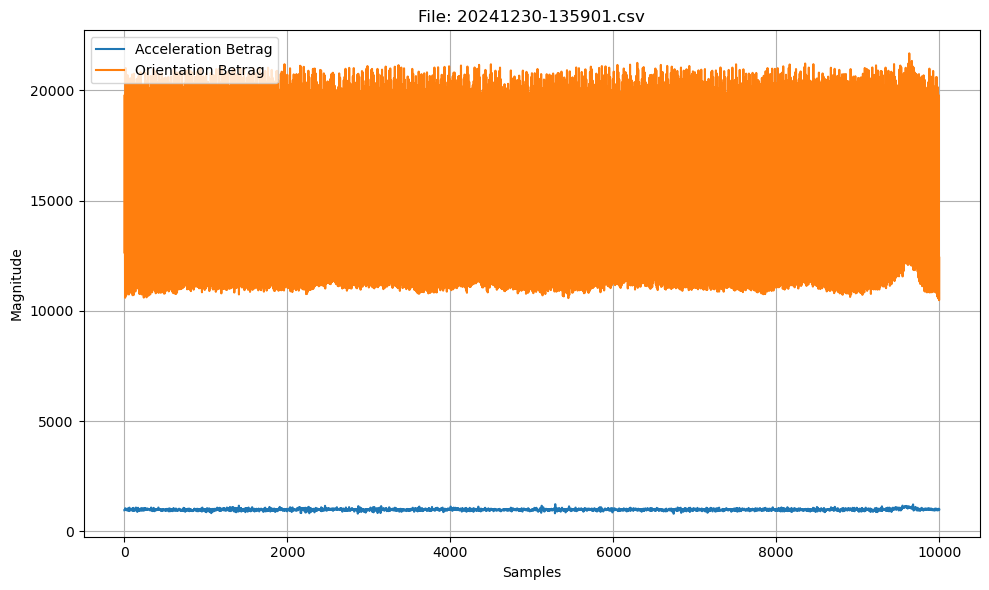

Processing: 20241230-165918.csv


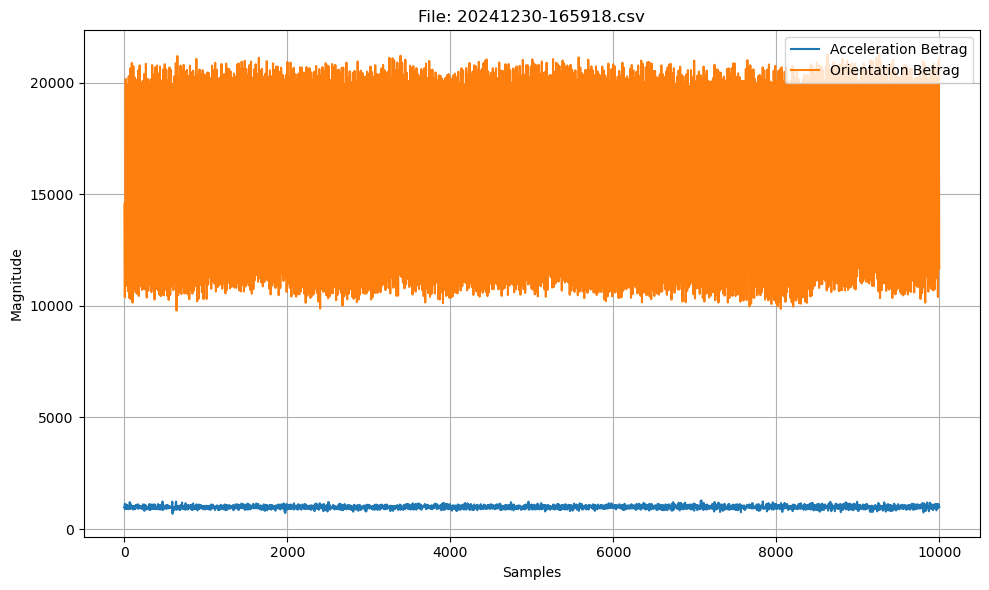

Processing: 20241230-174631.csv


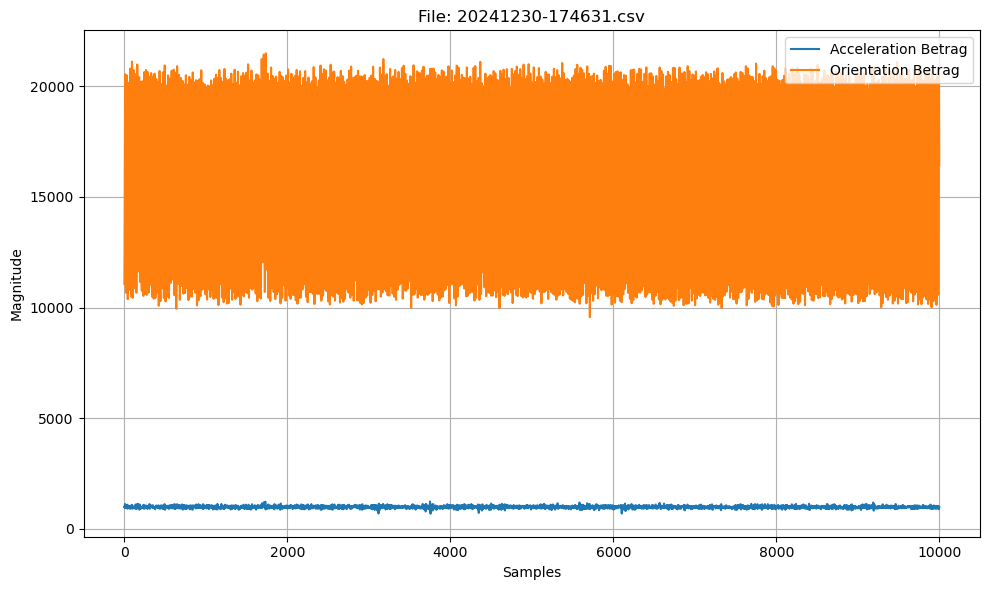

Processing: 20241230-183131.csv


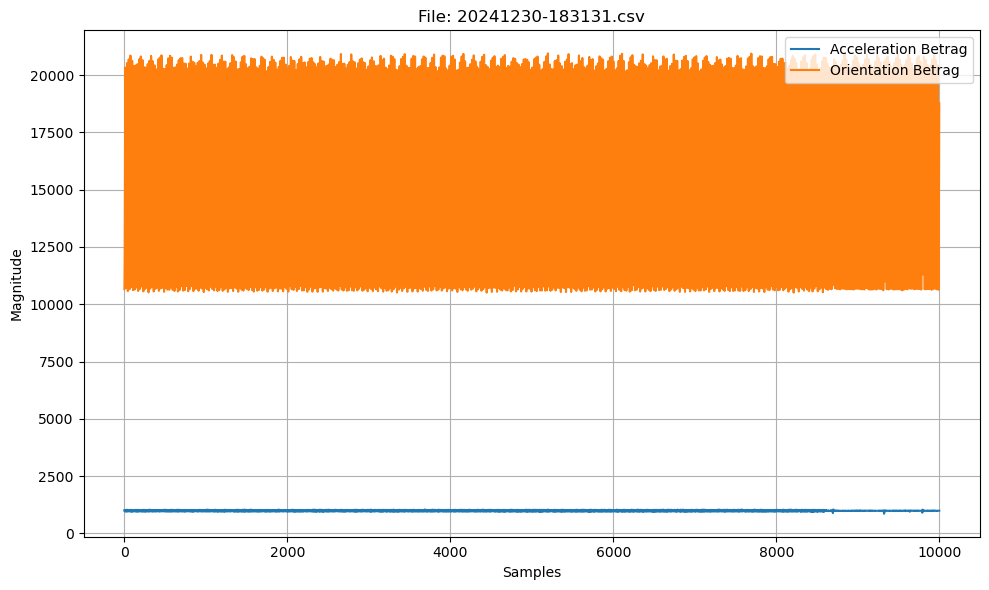

Processing: 20241230-181131.csv


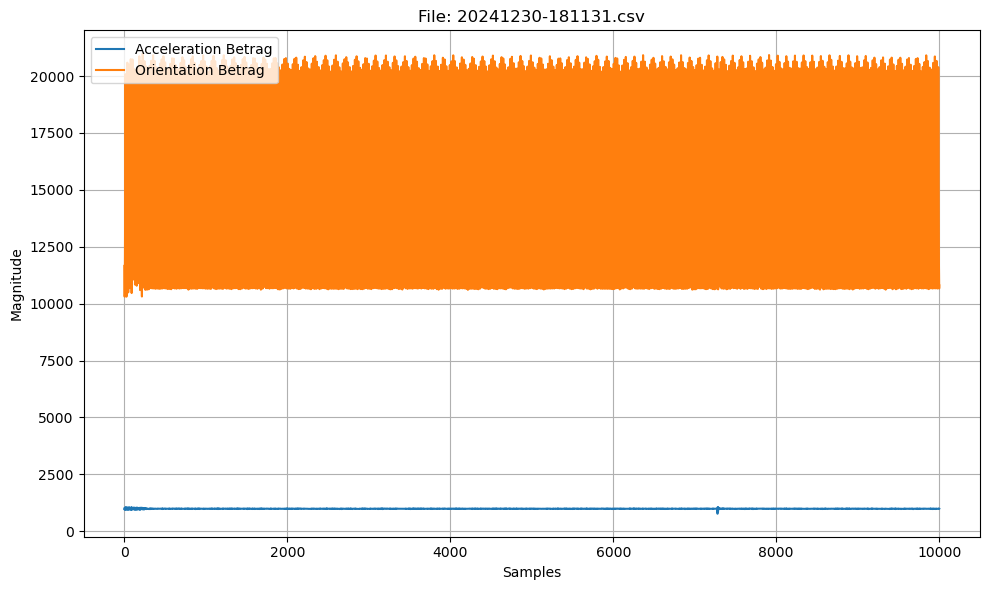

Processing: 20241230-134401.csv


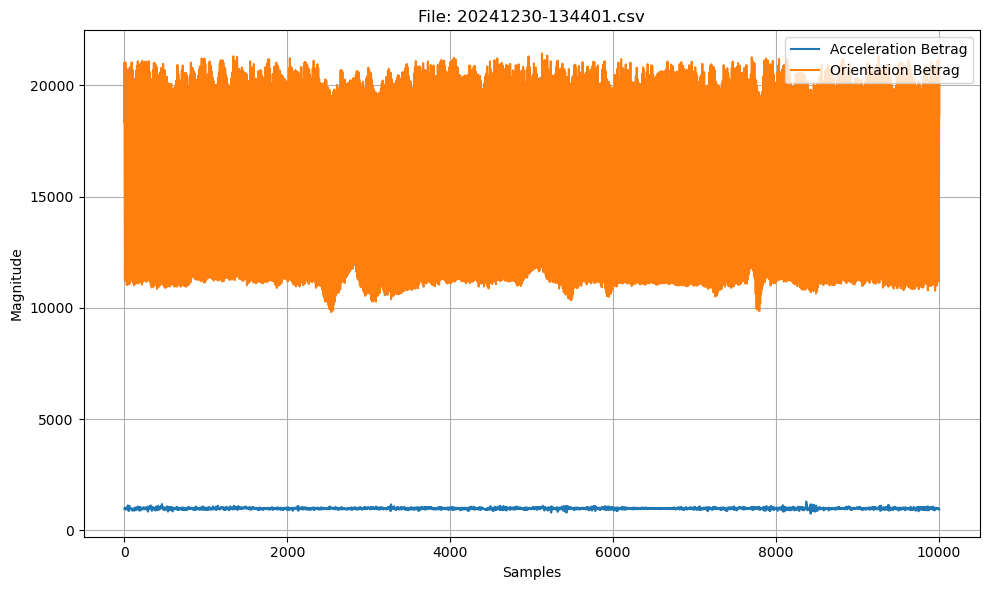

Processing: 20241230-164418.csv


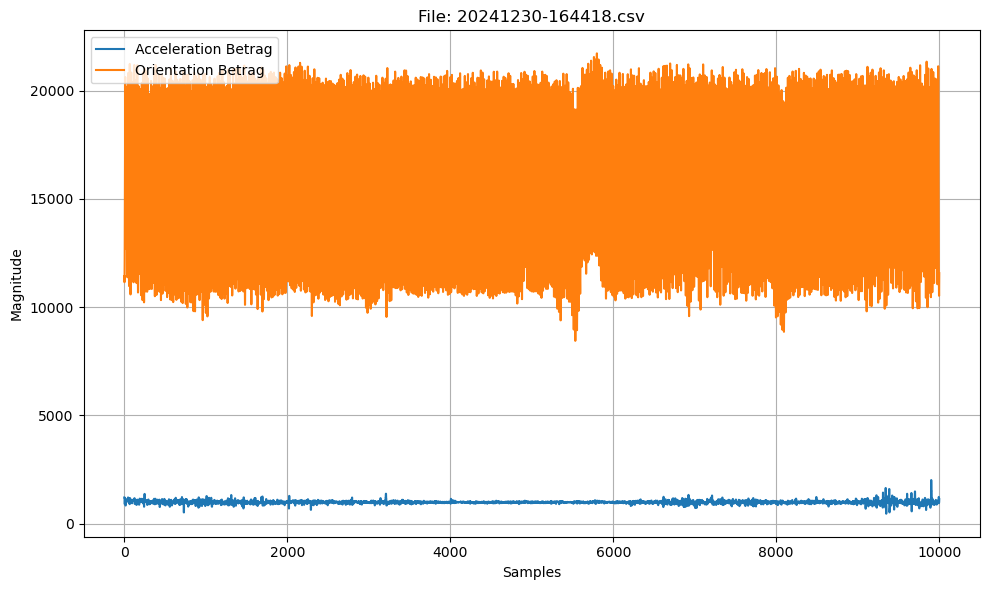

Processing: 20241230-143059.csv


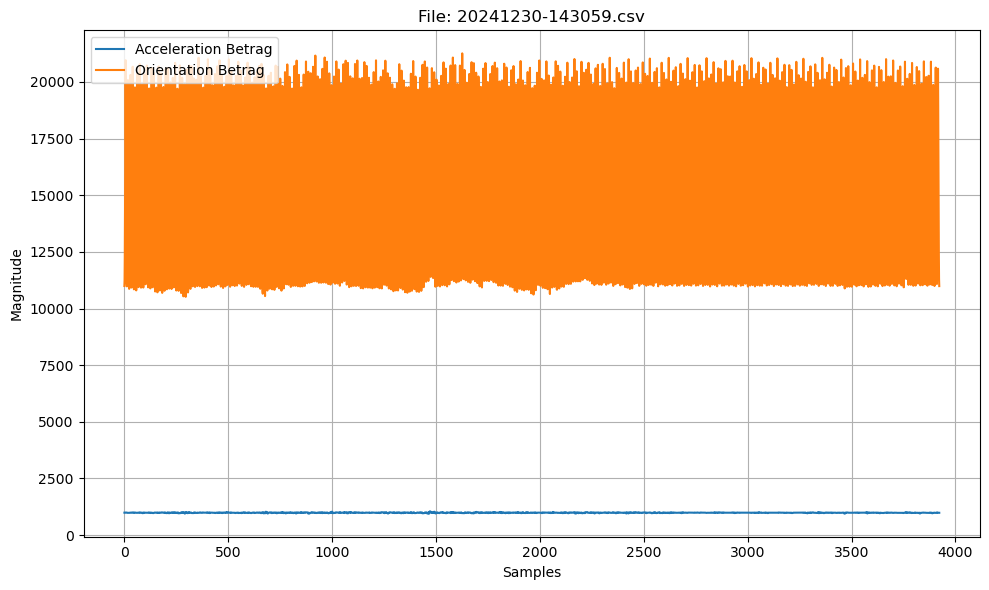

Processing: 20241230-170918.csv


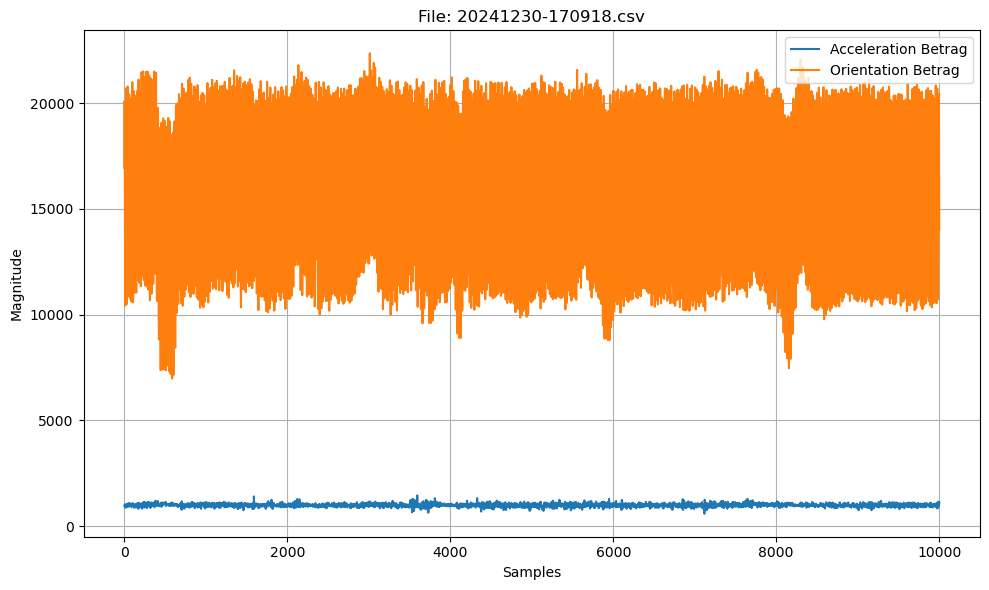

Processing: 20241230-140401.csv


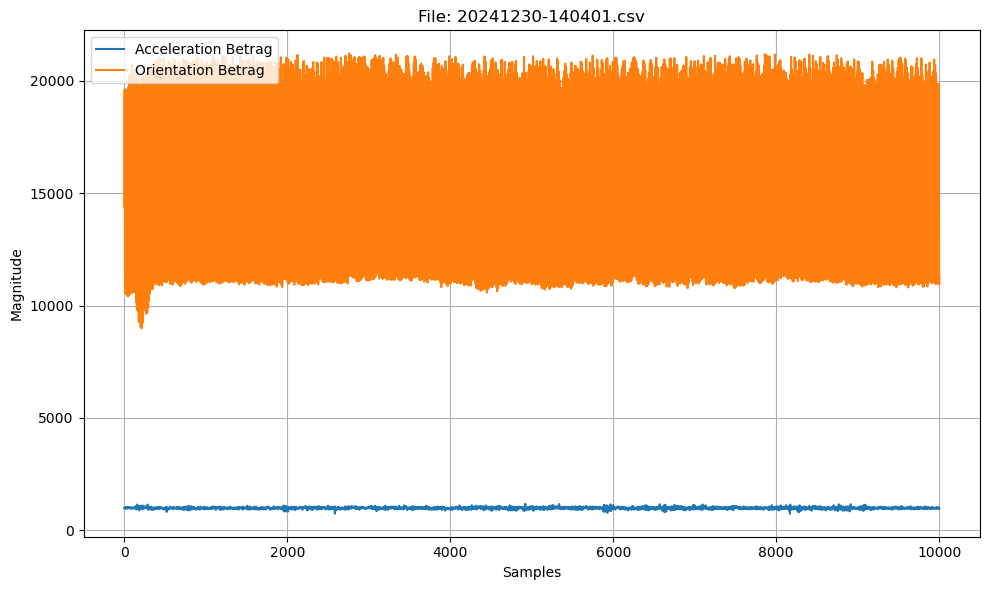

Processing: 20241230-180631.csv


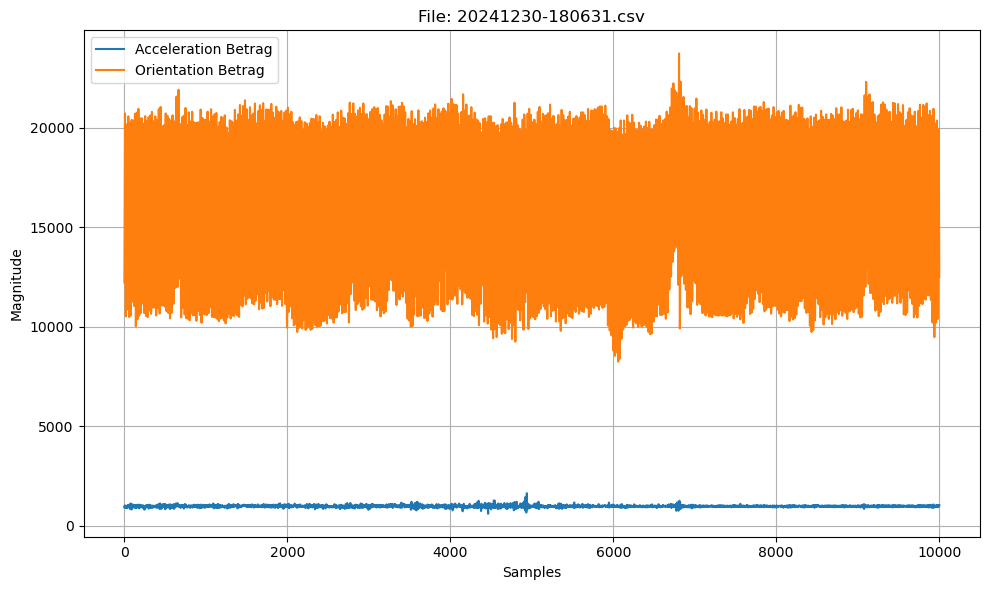

Processing: 20241230-132901.csv


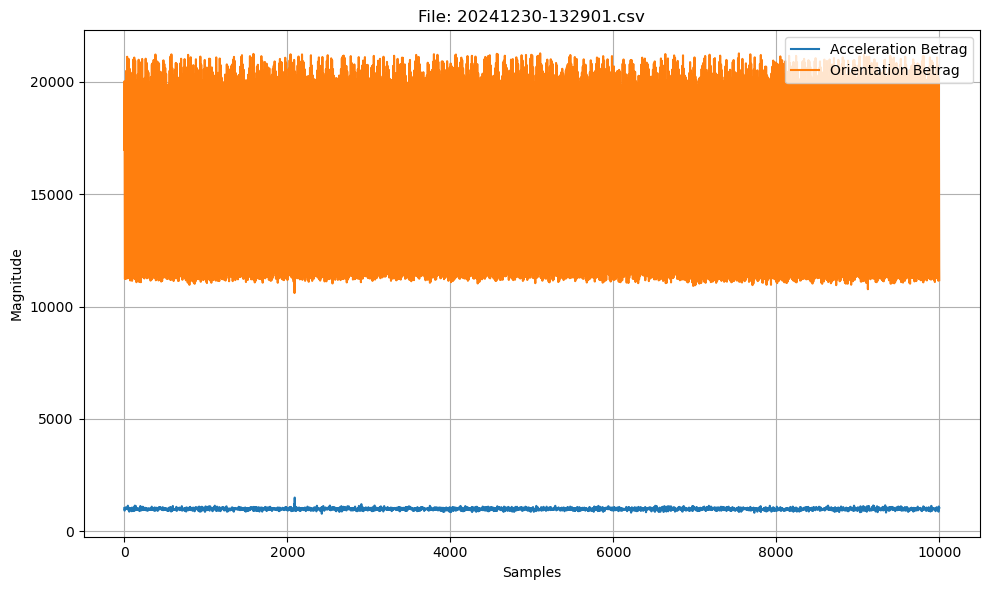

Processing: 20241230-162918.csv


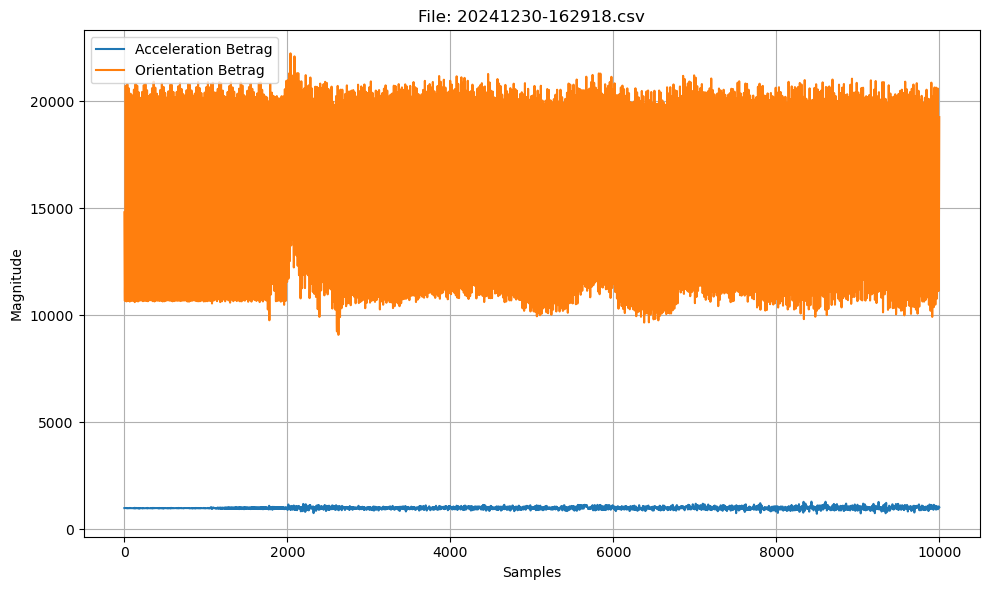

Processing: 20241230-184132.csv


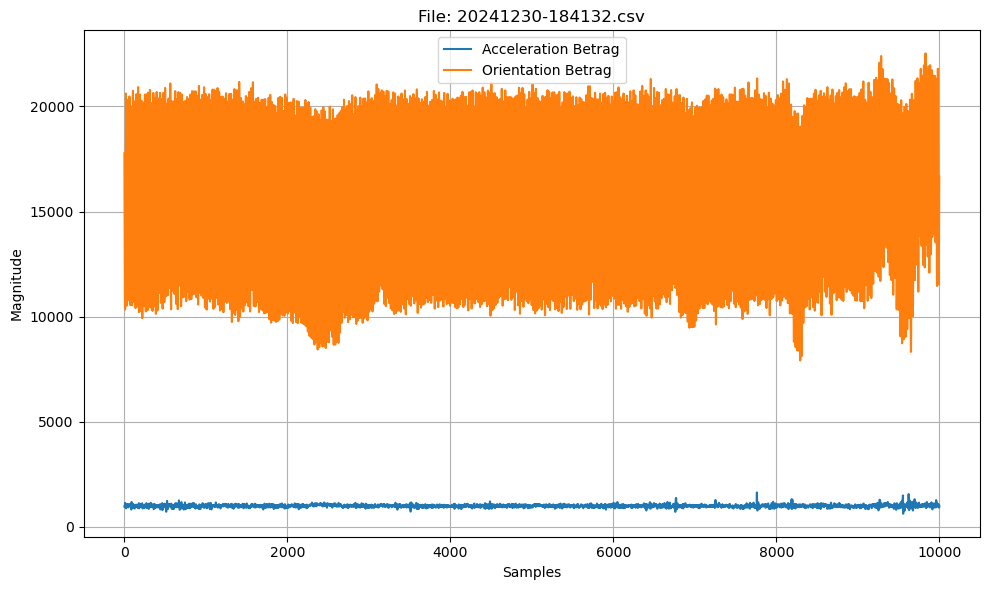

Processing: 20241230-173631.csv


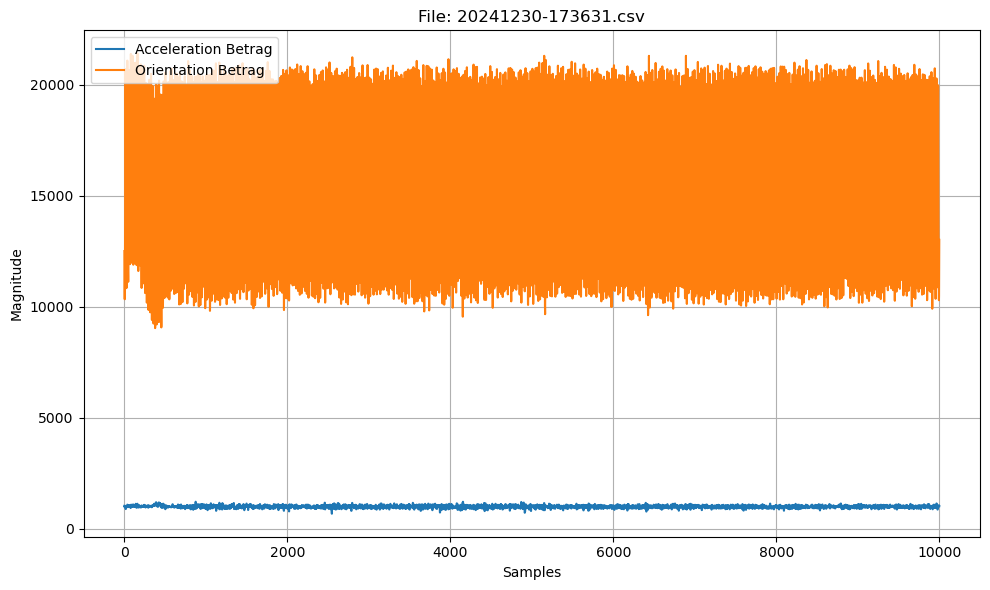

Processing: 20241230-142402.csv


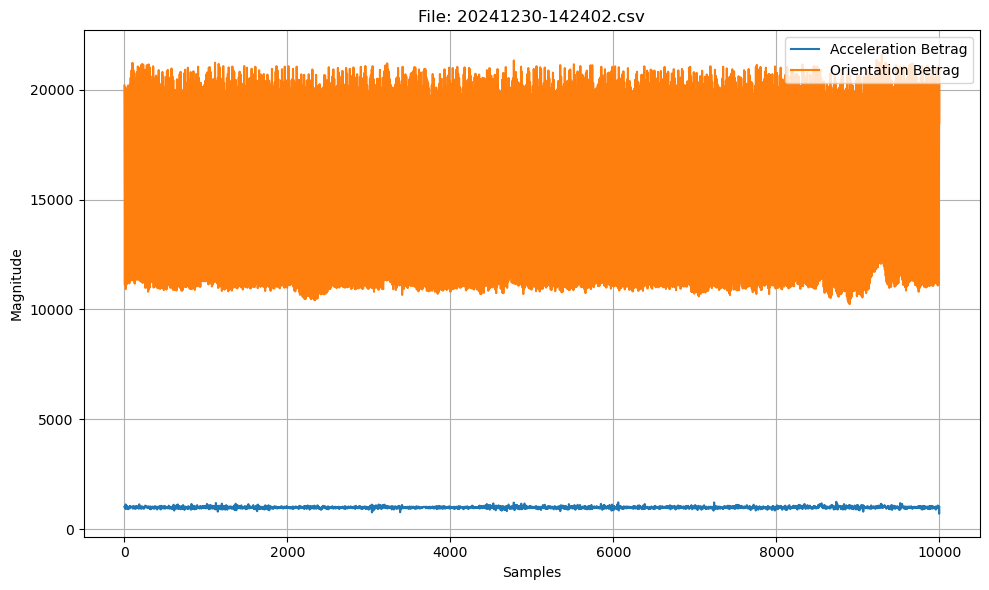

Processing: 20241230-133401.csv


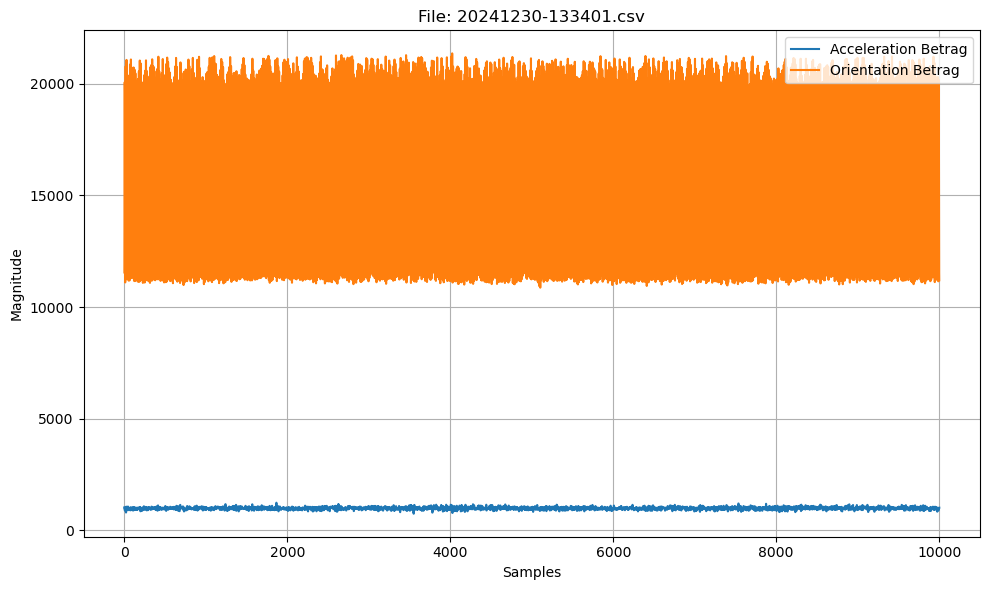

Processing: 20241230-171154.csv


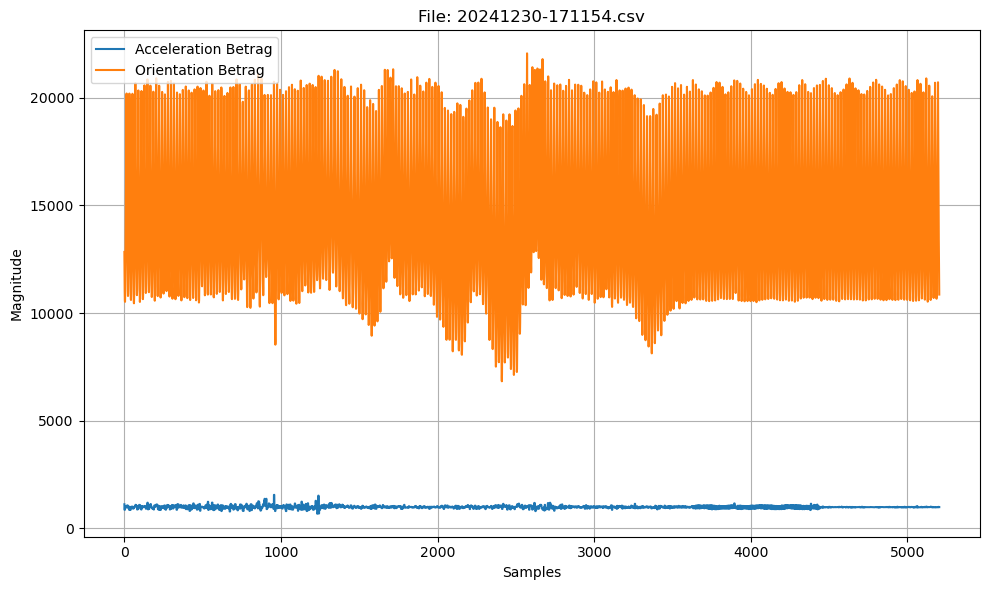

Processing: 20241230-141901.csv


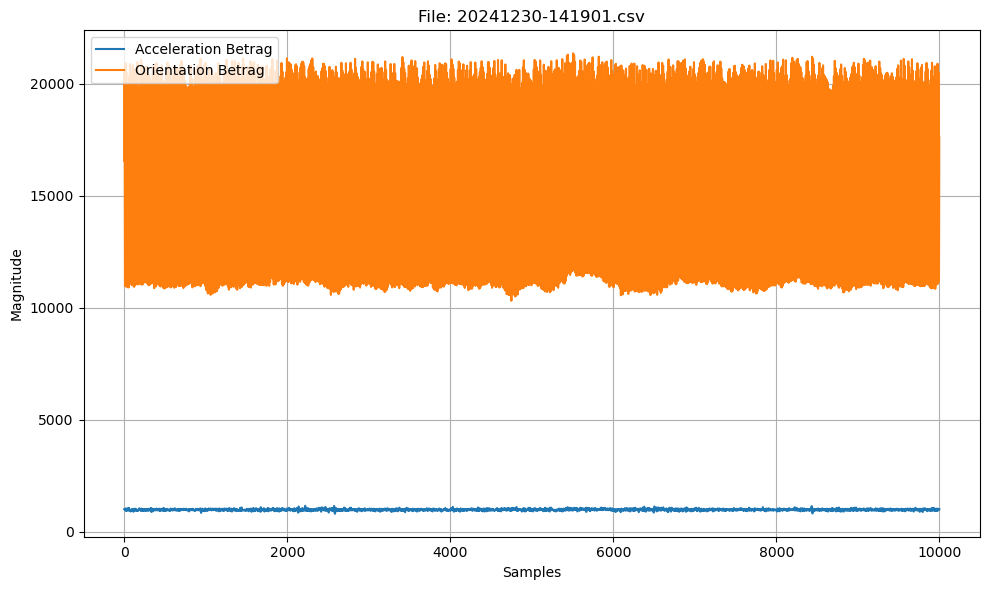

Processing: 20241230-163418.csv


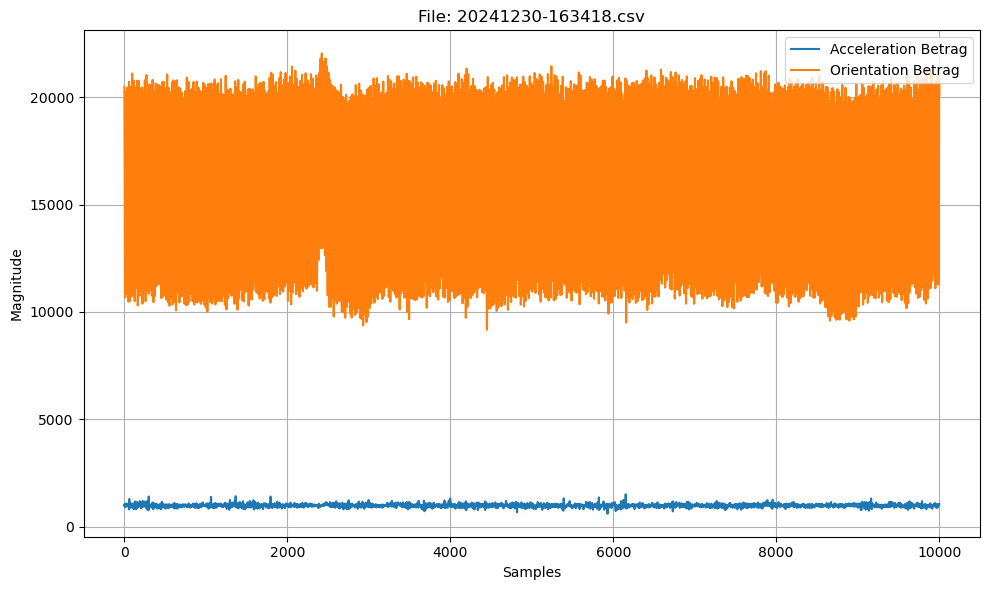

Processing: 20241230-182631.csv


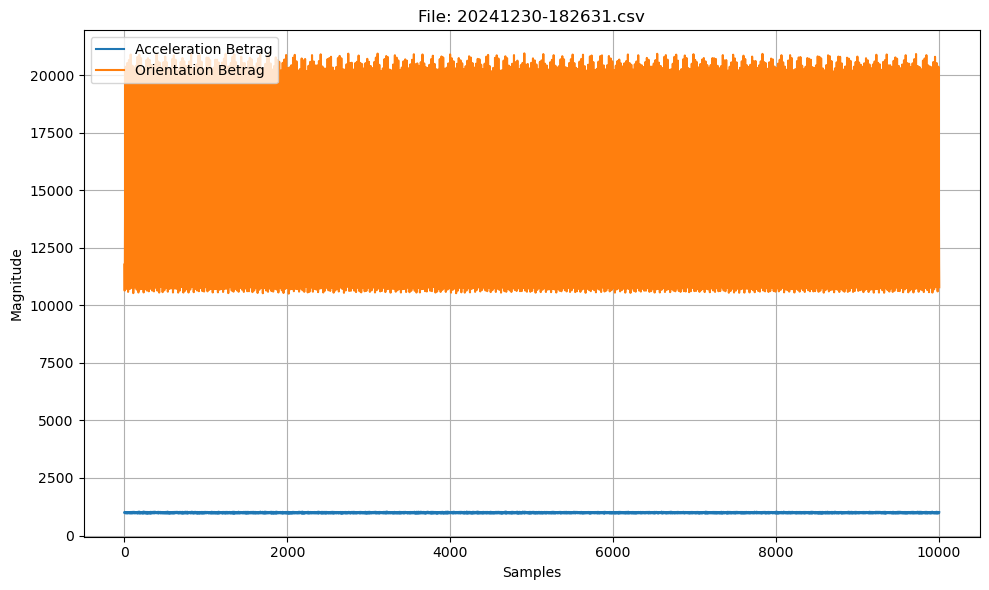

Processing: 20241230-175131.csv


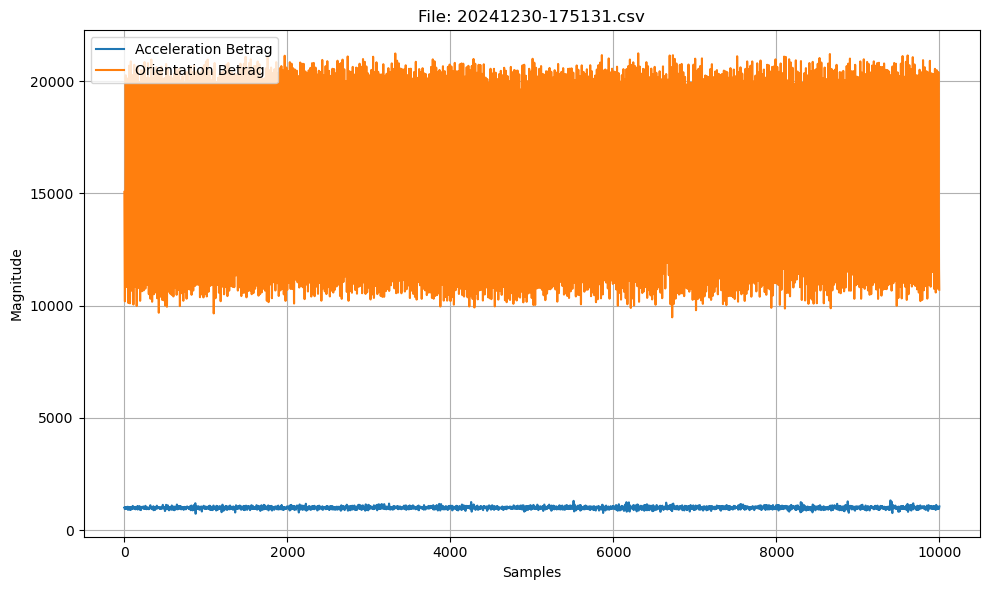

Processing: 20241230-182131.csv


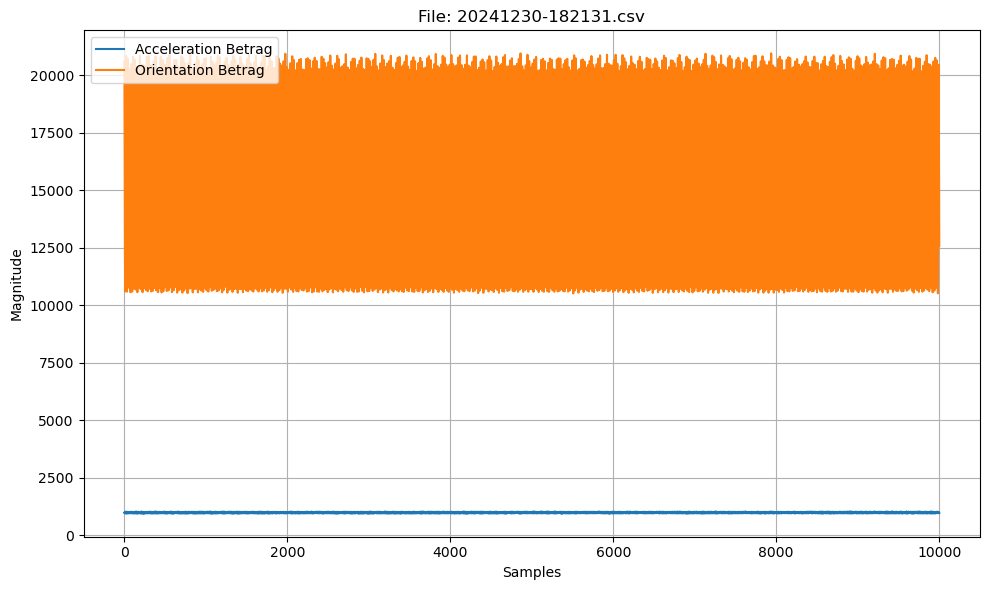

Processing: 20241230-175631.csv


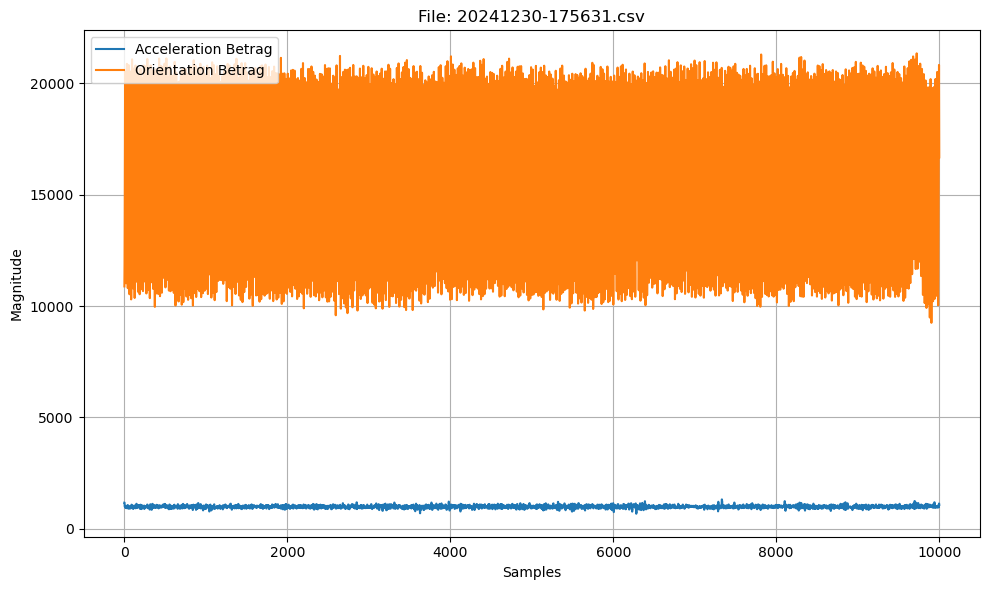

Processing: 20241230-134901.csv


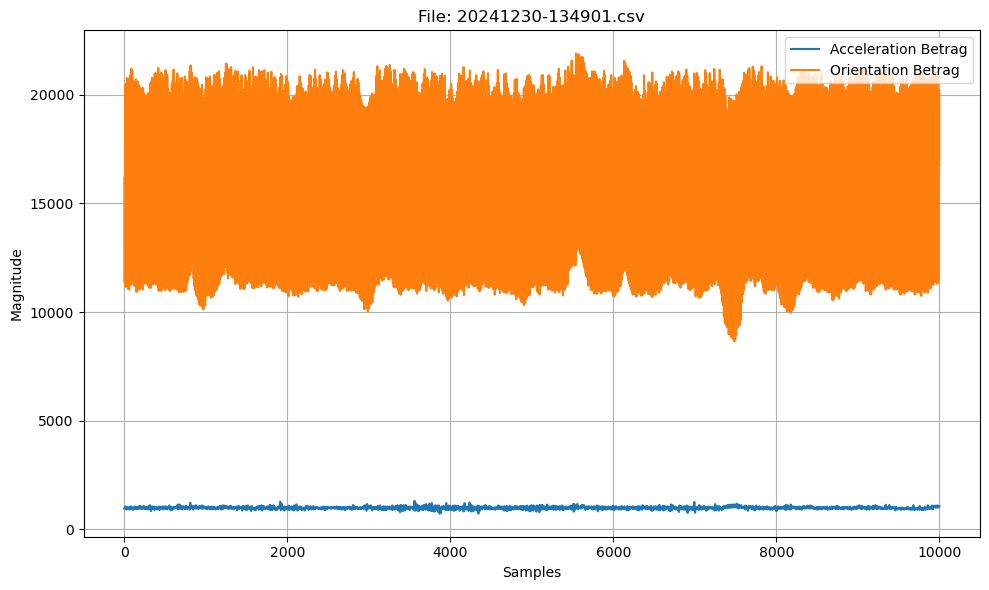

Processing: 20241230-164918.csv


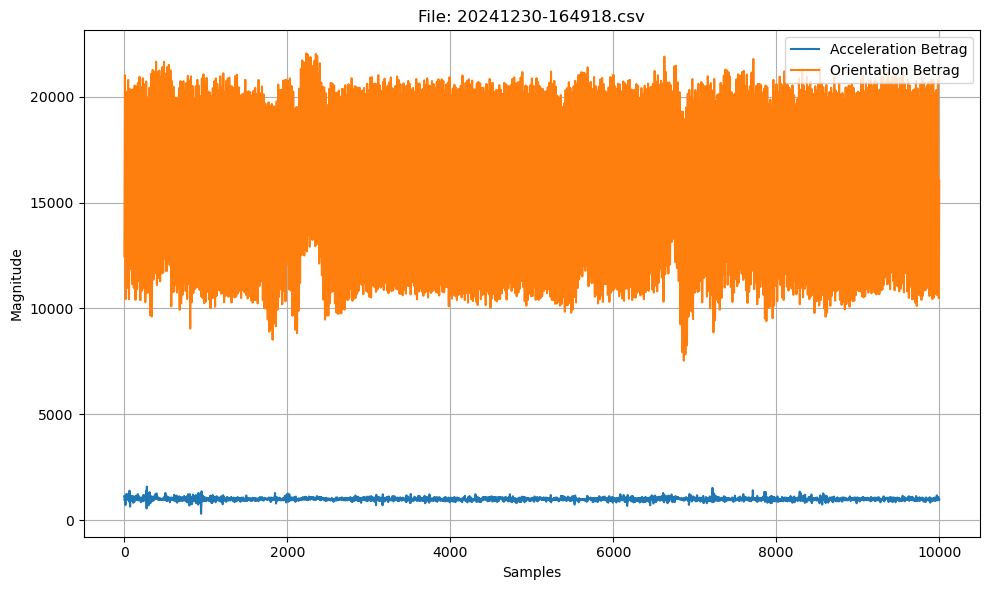

Processing: 20241230-173131.csv


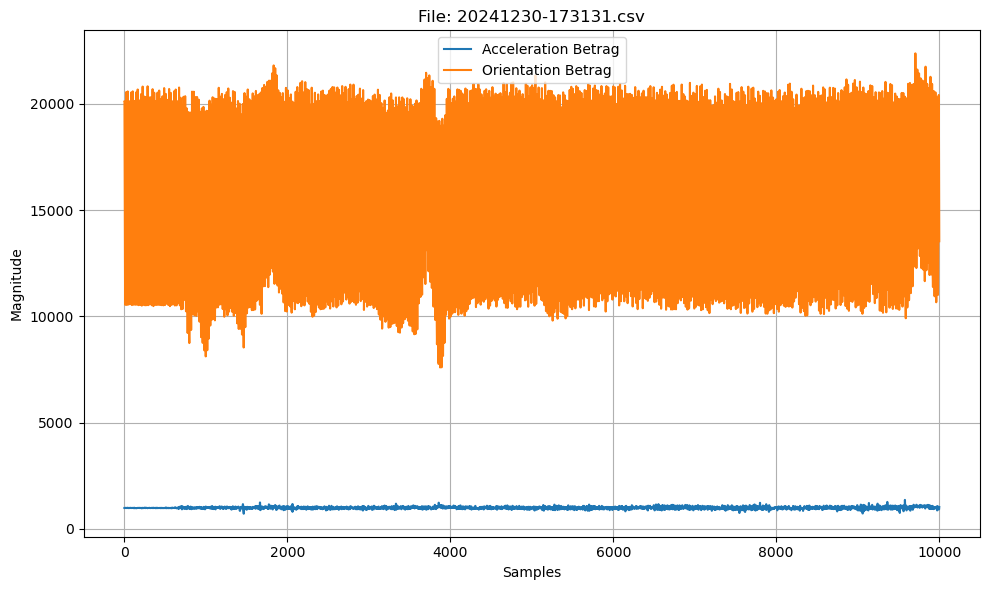

Processing: 20241230-135401.csv


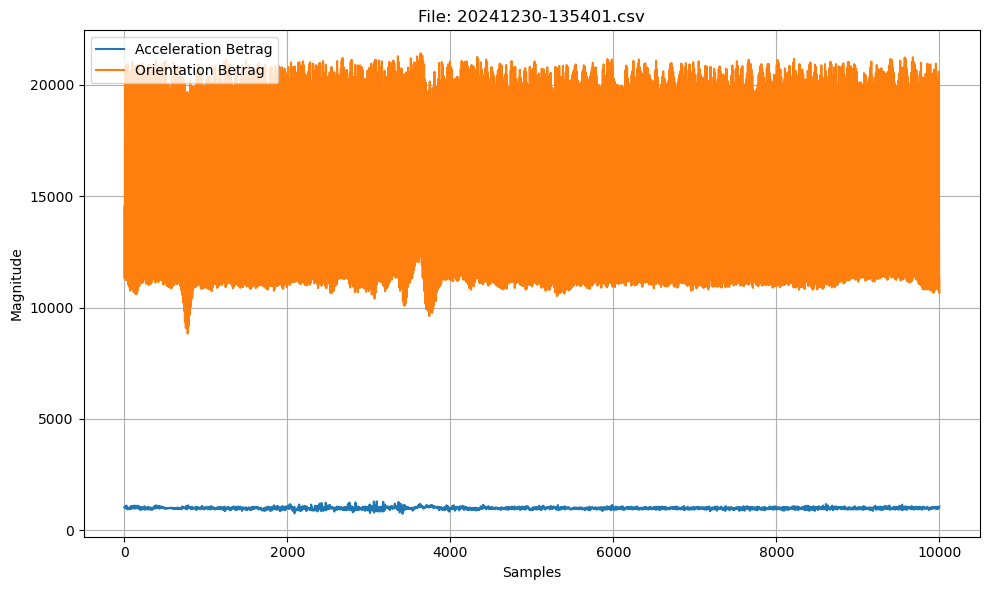

Processing: 20241230-165418.csv


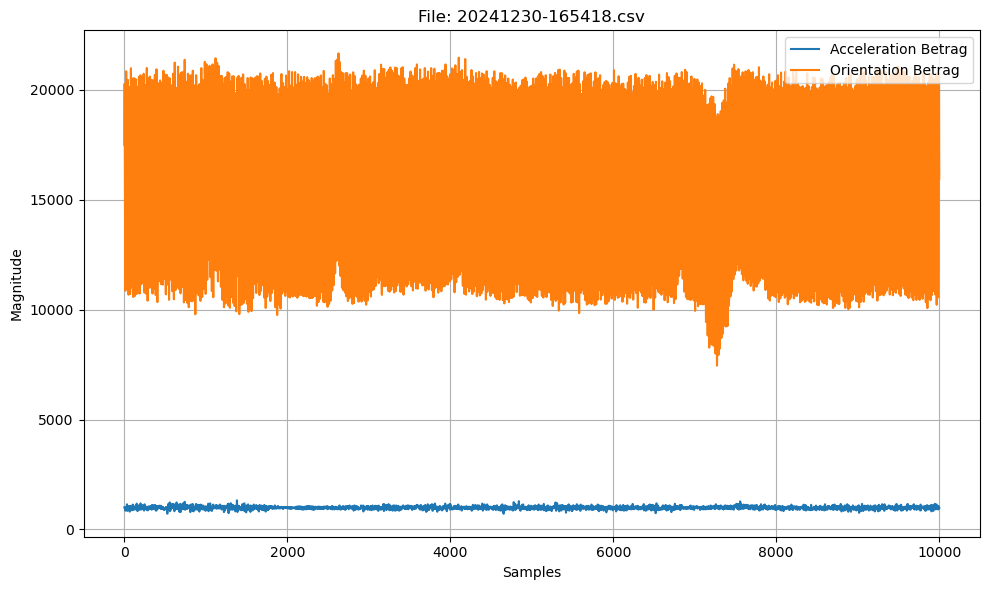

Processing: 20241230-180131.csv


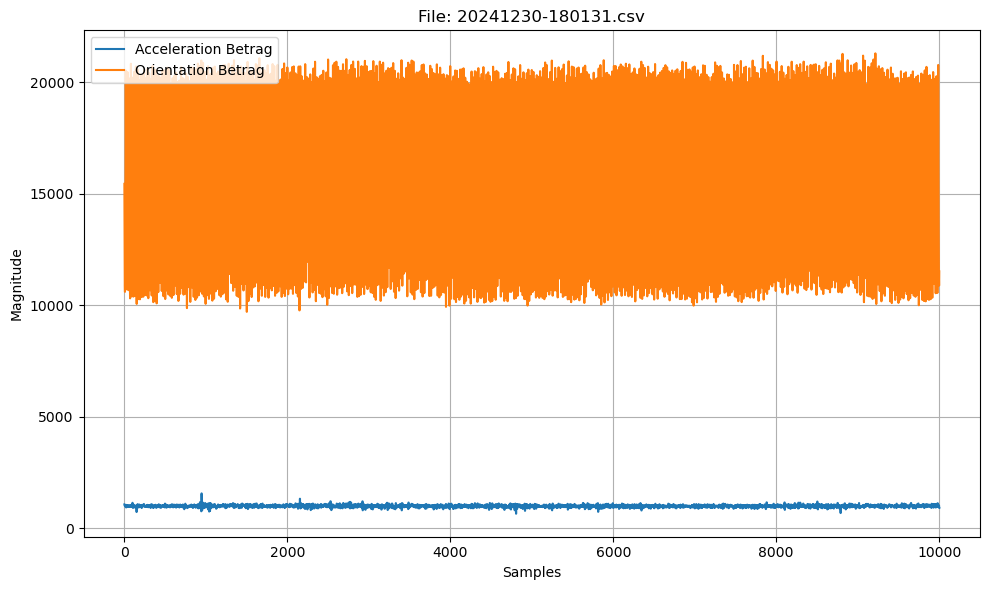

Processing: 20241230-184632.csv


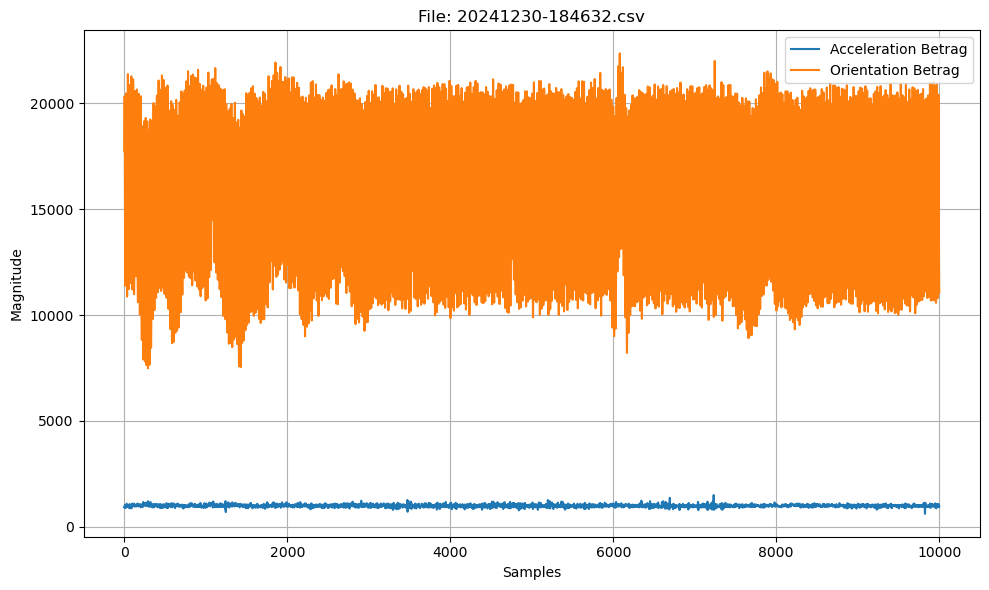

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ---------- CONFIGURATION ----------
FOLDER_PATH = "/Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/Fahrten/"  # Path to folder with CSV files

# ---------- FUNCTION TO PLOT CSV ----------
def plot_csv(file_path):
    """Reads and plots the 'Betrag' columns from a CSV file."""
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Check if required columns exist
    if 'Acc_Betrag' not in df.columns or 'Ori_Betrag' not in df.columns:
        print(f"Skipping {file_path}: Missing 'Betrag' or 'Ori_Betrag' columns.")
        return

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(df['Acc_Betrag'], label='Acceleration Betrag')
    plt.plot(df['Ori_Betrag'], label='Orientation Betrag')

    # Labels and title
    plt.title(f"File: {os.path.basename(file_path)}")
    plt.xlabel("Samples")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()


# ---------- PROCESS ALL CSV FILES ----------
def process_all_csv(folder_path):
    """Process and plot 'Betrag' columns from all CSV files in the folder."""
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"The folder {folder_path} does not exist.")
        return

    # Get all CSV files
    files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
    if not files:
        print("No CSV files found in the folder.")
        return

    # Plot each CSV file
    for file in files:
        file_path = os.path.join(folder_path, file)
        print(f"Processing: {file}")
        plot_csv(file_path)


# ---------- MAIN EXECUTION ----------
process_all_csv(FOLDER_PATH)

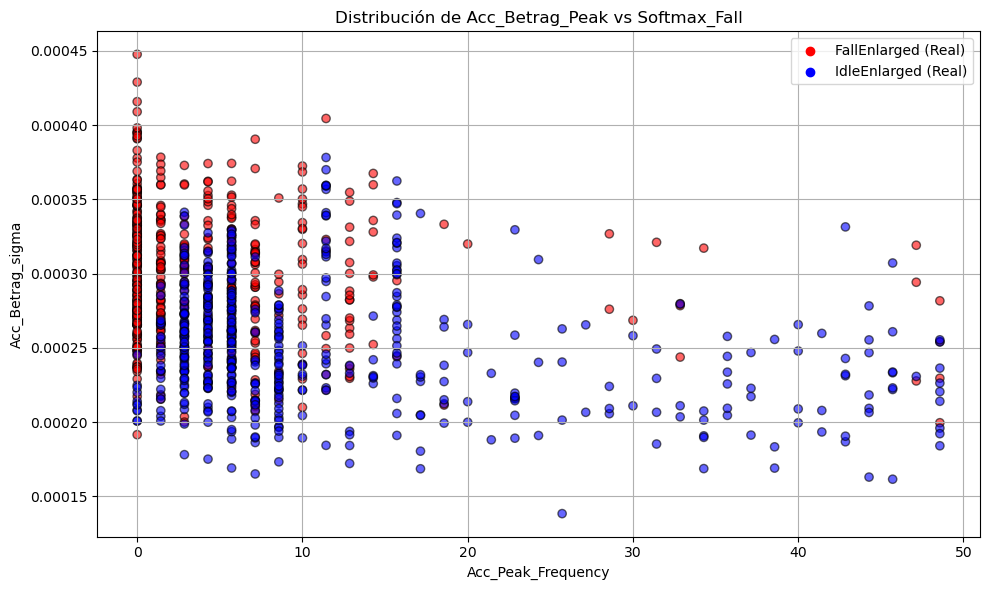

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------- CONFIGURACIÓN ----------
# Ruta del archivo CSV con las características
file_path = '/Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/feature_extraction.csv'

# ---------- CARGAR DATOS ----------
# Cargar el CSV
data = pd.read_csv(file_path)

# Mapear colores según Label real
colors = data['Label'].apply(lambda x: 'red' if x == 'FallEnlarged' else 'blue')

# ---------- GRAFICAR ----------
plt.figure(figsize=(10, 6))

# Graficar puntos
plt.scatter(data['Acc_Peak_Frequency'], data['Acc_Betrag_sigma'], c=colors, alpha=0.6, edgecolors='k')

# Etiquetas y título
plt.xlabel('Acc_Peak_Frequency')
plt.ylabel('Acc_Betrag_sigma')
plt.title('Distribución de Acc_Betrag_Peak vs Softmax_Fall')
plt.grid(True)

# Leyenda
plt.scatter([], [], c='red', label='FallEnlarged (Real)')
plt.scatter([], [], c='blue', label='IdleEnlarged (Real)')
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()

/var/folders/h4/99zkqrfj55s83p1q3x8dc1kh0000gn/T/ipykernel_1114/243253267.py:25: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


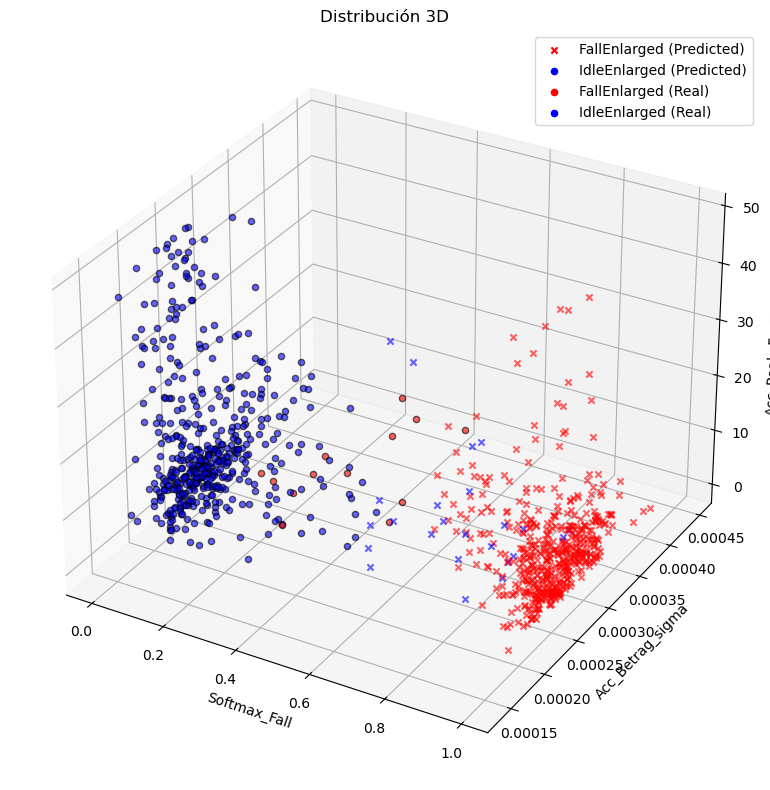

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ---------- CONFIGURACIÓN ----------
# Ruta del archivo CSV con las características
file_path = '/Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/feature_extraction.csv'

# ---------- CARGAR DATOS ----------
# Cargar el CSV
data = pd.read_csv(file_path)

# Mapear colores según Label real
colors = data['Label'].apply(lambda x: 'red' if x == 'FallEnlarged' else 'blue')

# Mapear formas según Predicted_Label
shapes = data['Predicted_Label'].apply(lambda x: 'x' if x == 'FallEnlarged' else 'o')

# ---------- GRAFICAR 3D ----------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos en 3D
for i in range(len(data)):
    ax.scatter(
        data['Softmax_Fall'][i],             # Eje X
        data['Acc_Betrag_sigma'][i],        # Eje Y
        data['Acc_Peak_Frequency'][i],      # Eje Z
        c=colors[i], alpha=0.6, edgecolors='k', marker=shapes[i]  # Forma y color
    )

# Etiquetas de ejes
ax.set_xlabel('Softmax_Fall')
ax.set_ylabel('Acc_Betrag_sigma')
ax.set_zlabel('Acc_Peak_Frequency')
ax.set_title('Distribución 3D')

# Leyenda
scatter1 = ax.scatter([], [], [], c='red', marker='x', label='FallEnlarged (Predicted)')
scatter2 = ax.scatter([], [], [], c='blue', marker='o', label='IdleEnlarged (Predicted)')
scatter3 = ax.scatter([], [], [], c='red', marker='o', label='FallEnlarged (Real)')
scatter4 = ax.scatter([], [], [], c='blue', marker='o', label='IdleEnlarged (Real)')

ax.legend(handles=[scatter1, scatter2, scatter3, scatter4])

# Mostrar gráfico
plt.tight_layout()
plt.show()

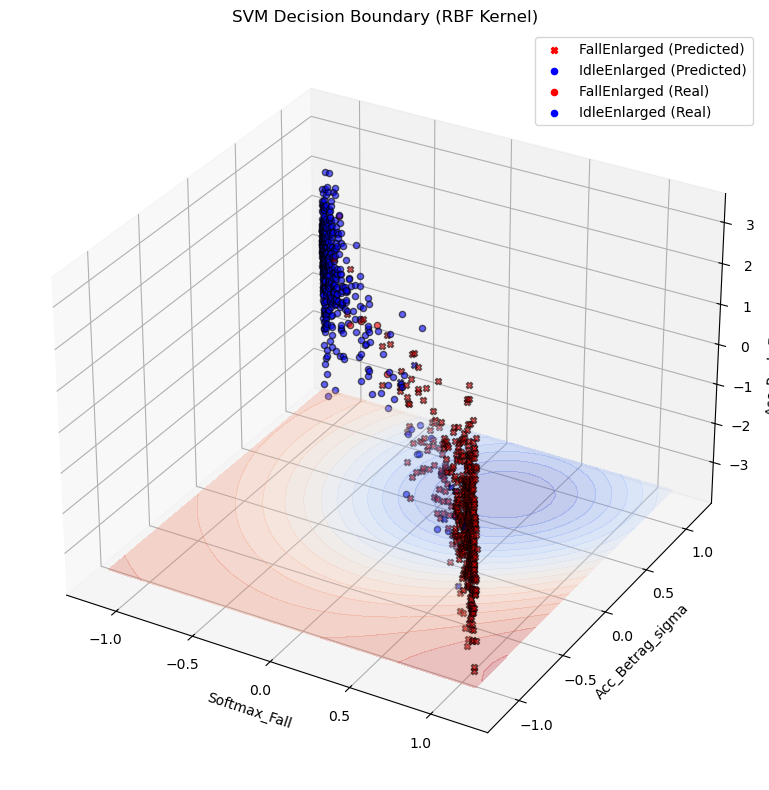

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

# ---------- CONFIGURACIÓN ----------
file_path = '/Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/feature_extraction.csv'

# ---------- CARGAR DATOS ----------
data = pd.read_csv(file_path)

# Preparar datos
X = data[['Softmax_Fall', 'Softmax_Idle', 'Acc_Betrag_mu', 'Acc_Betrag_sigma',
          'Ori_Betrag_mu', 'Ori_Betrag_sigma', 'Acc_Peak_Frequency']].values
y = data['Label'].apply(lambda x: 1 if x == 'FallEnlarged' else -1).values

# Estandarizar datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ---------- ENTRENAR SVM ----------
svm = SVC(kernel='rbf', C=1.0, gamma='auto', probability=True)
svm.fit(X, y)

# ---------- GRAFICAR 3D ----------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Colores según etiquetas reales
colors = ['red' if label == 1 else 'blue' for label in y]

# Formas según predicciones del SVM
predictions = svm.predict(X)
shapes = ['X' if pred == 1 else 'o' for pred in predictions]

# Graficar los puntos
for i in range(len(X)):
    ax.scatter(X[i, 0], X[i, 1], X[i, 2], c=colors[i], marker=shapes[i], alpha=0.6, edgecolors='k')

# ---------- GRAFICAR FRONTERA DE DECISIÓN ----------
x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 30)
y_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 30)

# Crear malla en 2D
xx, yy = np.meshgrid(x_range, y_range)
zz = np.zeros_like(xx)

# Evaluar modelo en cada punto de la malla
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        # Crear punto con todas las características
        point = np.zeros((1, X.shape[1]))  # Inicializa en 0
        point[0, 0] = xx[i, j]  # Softmax_Fall
        point[0, 1] = yy[i, j]  # Acc_Betrag_sigma
        point[0, 2] = 0         # Proyectado en Z

        # Transformar punto
        point = scaler.transform(point)

        # Evaluar frontera de decisión
        zz[i, j] = svm.decision_function(point)[0]

# Dibujar superficie de decisión
ax.contourf(xx, yy, zz, zdir='z', offset=X[:, 2].min(), levels=20, cmap='coolwarm', alpha=0.3)

# Etiquetas de ejes
ax.set_xlabel('Softmax_Fall')
ax.set_ylabel('Acc_Betrag_sigma')
ax.set_zlabel('Acc_Peak_Frequency')
ax.set_title('SVM Decision Boundary (RBF Kernel)')

# Leyenda
scatter1 = ax.scatter([], [], [], c='red', marker='X', label='FallEnlarged (Predicted)')
scatter2 = ax.scatter([], [], [], c='blue', marker='o', label='IdleEnlarged (Predicted)')
scatter3 = ax.scatter([], [], [], c='red', marker='o', label='FallEnlarged (Real)')
scatter4 = ax.scatter([], [], [], c='blue', marker='o', label='IdleEnlarged (Real)')
ax.legend(handles=[scatter1, scatter2, scatter3, scatter4])

# Mostrar gráfico
plt.tight_layout()
plt.show()

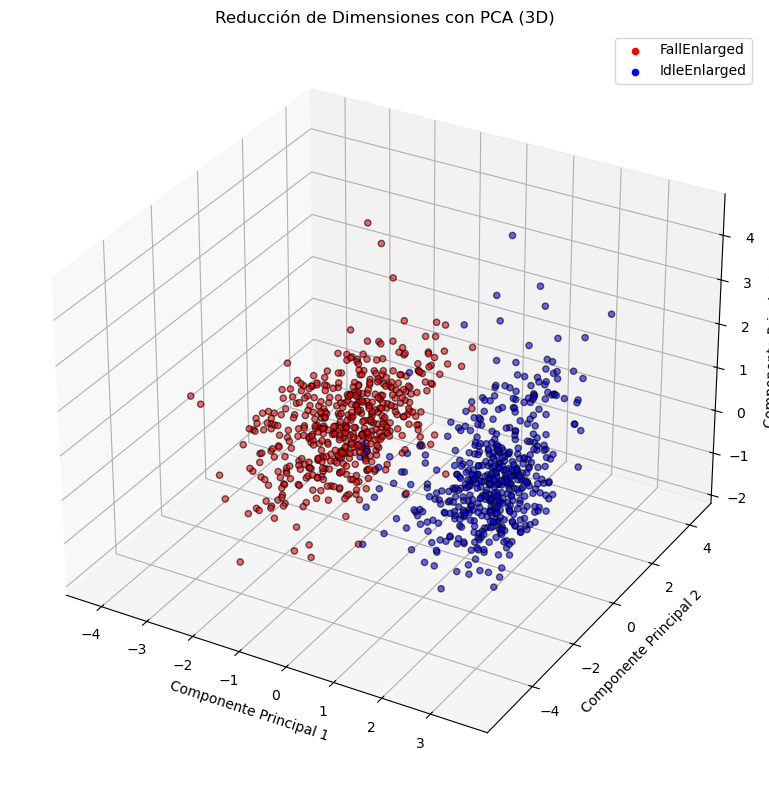

In [88]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = data[['Softmax_Fall', 'Softmax_Idle', 'Acc_Betrag_mu', 'Acc_Betrag_sigma',
          'Ori_Betrag_mu', 'Ori_Betrag_sigma', 'Acc_Peak_Frequency']].values

# Escalar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------- APLICAR PCA ----------
pca = PCA(n_components=3)  # Reducir a 3 dimensiones
X_pca = pca.fit_transform(X_scaled)

# ---------- GRAFICAR 3D ----------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Colores según la etiqueta real
colors = data['Label'].apply(lambda x: 'red' if x == 'FallEnlarged' else 'blue')

# Graficar los puntos
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=colors, alpha=0.6, edgecolors='k')

# Etiquetas de los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Reducción de Dimensiones con PCA (3D)')

# Leyenda
scatter1 = ax.scatter([], [], [], c='red', label='FallEnlarged')
scatter2 = ax.scatter([], [], [], c='blue', label='IdleEnlarged')
ax.legend(handles=[scatter1, scatter2])

# Mostrar gráfico
plt.tight_layout()
plt.show()

Precisión en entrenamiento: 0.99
Precisión en prueba: 0.97


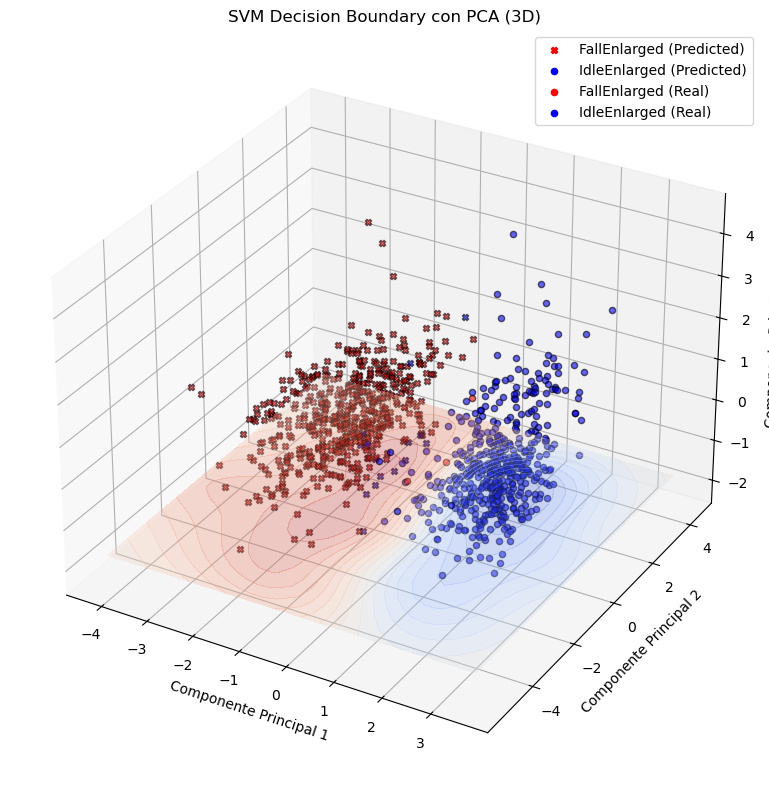

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# ---------- CONFIGURACIÓN ----------
# Ruta del archivo CSV
file_path = '/Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/feature_extraction.csv'

# ---------- CARGAR DATOS ----------
# Cargar el CSV
data = pd.read_csv(file_path)

# Preparar los datos
X = data[['Softmax_Fall', 'Softmax_Idle', 'Acc_Betrag_mu', 'Acc_Betrag_sigma',
          'Ori_Betrag_mu', 'Ori_Betrag_sigma', 'Acc_Peak_Frequency']].values
y = data['Label'].apply(lambda x: 1 if x == 'FallEnlarged' else -1).values

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------- PCA ----------
pca = PCA(n_components=3)  # Reducir a 3 dimensiones
X_pca = pca.fit_transform(X_scaled)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# ---------- ENTRENAR SVM ----------
svm = SVC(kernel='rbf', C=1.0, gamma='auto', probability=True)
svm.fit(X_train, y_train)

# Evaluar el modelo
train_acc = svm.score(X_train, y_train)
test_acc = svm.score(X_test, y_test)
print(f'Precisión en entrenamiento: {train_acc:.2f}')
print(f'Precisión en prueba: {test_acc:.2f}')

# ---------- GRAFICAR 3D ----------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Colores según etiquetas reales
colors = ['red' if label == 1 else 'blue' for label in y]

# Formas según predicciones del SVM
predictions = svm.predict(X_pca)
shapes = ['X' if pred == 1 else 'o' for pred in predictions]

# Graficar puntos
for i in range(len(X_pca)):
    ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c=colors[i], marker=shapes[i], alpha=0.6, edgecolors='k')

# ---------- GRAFICAR FRONTERA DE DECISIÓN ----------
# Crear malla en 2D para proyectar la frontera sobre un plano fijo (Z = 0)
x_range = np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 30)
y_range = np.linspace(X_pca[:, 1].min(), X_pca[:, 1].max(), 30)
xx, yy = np.meshgrid(x_range, y_range)

# Evaluar modelo en cada punto de la malla
grid = np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())]  # Proyectar en Z = 0
grid_predictions = svm.decision_function(grid).reshape(xx.shape)

# Dibujar contorno 2D proyectado en 3D
ax.contourf(xx, yy, grid_predictions, zdir='z', offset=X_pca[:, 2].min(), levels=20, cmap='coolwarm', alpha=0.3)

# ---------- ETIQUETAS ----------
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('SVM Decision Boundary con PCA (3D)')

# Leyenda
scatter1 = ax.scatter([], [], [], c='red', marker='X', label='FallEnlarged (Predicted)')
scatter2 = ax.scatter([], [], [], c='blue', marker='o', label='IdleEnlarged (Predicted)')
scatter3 = ax.scatter([], [], [], c='red', marker='o', label='FallEnlarged (Real)')
scatter4 = ax.scatter([], [], [], c='blue', marker='o', label='IdleEnlarged (Real)')
ax.legend(handles=[scatter1, scatter2, scatter3, scatter4])

plt.tight_layout()
plt.show()

In [101]:
file_path = '/Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/feature_extraction.csv'
data = pd.read_csv(file_path)
data

File Predicted_Label  Softmax_Fall  \
0    data_20241228-191938_aug_13.csv    FallEnlarged      0.901566   
1     data_20241228-191938_aug_8.csv    FallEnlarged      0.952946   
2    data_20241228-175547_aug_19.csv    FallEnlarged      0.950212   
3    data_20241228-175547_aug_25.csv    FallEnlarged      0.961264   
4    data_20241228-191813_aug_15.csv    FallEnlarged      0.907952   
..                               ...             ...           ...   
995  data_20241228-193331_aug_24.csv    IdleEnlarged      0.026018   
996  data_20241228-193331_aug_18.csv    IdleEnlarged      0.009946   
997  data_20241228-193706_aug_10.csv    IdleEnlarged      0.057961   
998  data_20241228-193137_aug_20.csv    IdleEnlarged      0.023593   
999  data_20241228-192930_aug_21.csv    IdleEnlarged      0.003139   

     Softmax_Idle  Acc_Betrag_mu  Acc_Betrag_sigma  Acc_X_mu  Acc_X_sigma  \
0        0.098434      -0.055085          0.000261 -0.102611     0.230819   
1        0.047054       0.073782          0.000330  0.010028     0.311373   
2        0.049788      -0.047468          0.000290 -0.266032     0.328078   
3        0.038736       0.134953          0.000299 -0.048530     0.348859   
4        0.092048      -0.156740          0.000260 -0.083784     0.207522   
..            ...            ...               ...       ...          ...   
995      0.973982      -0.431004          0.000331  0.032855     0.406929   
996      0.990054      -0.413002          0.000209 -0.152475     0.366889   
997      0.942039      -0.224150          0.000189  0.058306     0.275984   
998      0.976407       0.052777          0.000266 -0.125990     0.421355   
999      0.996861       0.018825          0.000254 -0.047486     0.488277   

     Acc_Y_mu  Acc_Y_sigma  ...  Ori_X_mu  Ori_X_sigma  Ori_Y_mu  Ori_Y_sigma  \
0   -0.142547     0.280145  ... -0.053206     0.007972 -0.056232     0.002716   
1   -0.050835     0.290663  ...  0.074896     0.009842  0.072689     0.003847   
2    0.134309     0.320559  ... -0.049109     0.017910 -0.050919     0.006198   
3    0.314463     0.293155  ...  0.138971     0.020033  0.131056     0.005780   
4   -0.161763     0.277864  ... -0.162625     0.013920 -0.156797     0.004241   
..        ...          ...  ...       ...          ...       ...          ...   
995 -0.141417     0.399677  ... -0.437786     0.013826 -0.432553     0.005359   
996 -0.121786     0.365449  ... -0.418365     0.009714 -0.414471     0.004145   
997 -0.235884     0.304423  ... -0.225210     0.012459 -0.223897     0.004569   
998  0.246098     0.313057  ...  0.052019     0.009863  0.049965     0.003645   
999  0.024634     0.394061  ...  0.013642     0.012573  0.019624     0.003437   

     Ori_Z_mu  Ori_Z_sigma  Acc_Betrag_Peak  Ori_Betrag_Peak  \
0   -0.055224     0.009279        -0.054180        -0.055436   
1    0.071106     0.013367         0.074708         0.073421   
2   -0.055694     0.017818        -0.046866        -0.047812   
3    0.127786     0.020268         0.135648         0.134555   
4   -0.160914     0.012562        -0.155826        -0.157063   
..        ...          ...              ...              ...   
995 -0.431918     0.020676        -0.430177        -0.431548   
996 -0.410562     0.016578        -0.412479        -0.413392   
997 -0.226485     0.012657        -0.223599        -0.224440   
998  0.050921     0.013211         0.053575         0.052301   
999  0.018242     0.011172         0.019309         0.018329   

     Acc_Peak_Frequency         Label  
0              5.714286  FallEnlarged  
1              5.714286  FallEnlarged  
2              0.000000  FallEnlarged  
3              0.000000  FallEnlarged  
4              7.142857  FallEnlarged  
..                  ...           ...  
995           42.857143  IdleEnlarged  
996           35.714286  IdleEnlarged  
997           10.000000  IdleEnlarged  
998           27.142857  IdleEnlarged  
999            2.857143  IdleEnlarged  

[1000 rows x 24 columns]

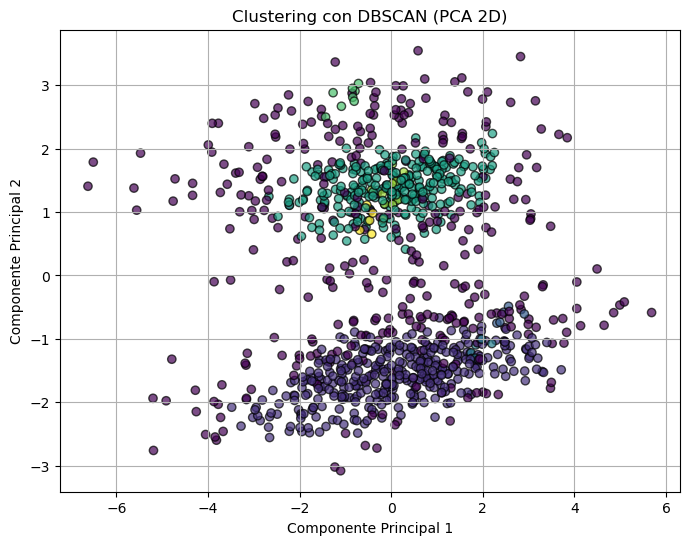

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ---------- CARGAR DATOS ----------
file_path = '/Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/feature_extraction.csv'
data = pd.read_csv(file_path)

# Preparar características
X = data[['Acc_Betrag_mu', 'Acc_Betrag_sigma', 'Acc_Betrag_Peak', 'Acc_Peak_Frequency', 'Ori_Betrag_Peak', 'Softmax_Fall', 'Softmax_Idle']].values

# ---------- PREPROCESAMIENTO ----------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir dimensiones para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ---------- DBSCAN ----------
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajusta parámetros según sea necesario
clusters = dbscan.fit_predict(X_scaled)

# ---------- GRAFICAR RESULTADOS ----------
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7, edgecolors='k')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering con DBSCAN (PCA 2D)')
plt.grid(True)
plt.show()

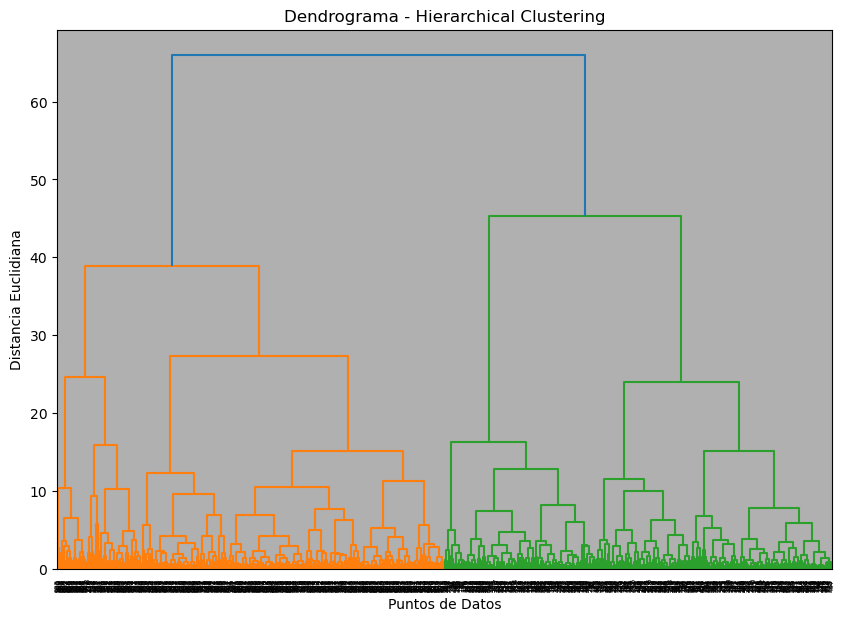

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ---------- CARGAR DATOS ----------
file_path = '/Users/joseheinz/Documents/Arbeit/G2/Silabs/PYTHON_LOG/SVM/Datasets/acceleration/feature_extraction.csv'
data = pd.read_csv(file_path)

# Preparar características
X = data[['Acc_Betrag_mu', 'Acc_Betrag_sigma', 'Acc_Betrag_Peak', 'Acc_Peak_Frequency', 'Ori_Betrag_Peak', 'Softmax_Fall', 'Softmax_Idle']].values

# ---------- PREPROCESAMIENTO ----------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir dimensiones para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ---------- HIERARCHICAL CLUSTERING ----------
linked = linkage(X_scaled, method='ward')  # 'ward' minimiza varianza dentro de clusters

# ---------- GRAFICAR DENDROGRAMA ----------
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Dendrograma - Hierarchical Clustering')
plt.xlabel('Puntos de Datos')
plt.ylabel('Distancia Euclidiana')
plt.grid(True)
plt.show()